In [75]:
import requests
import pytz
import datetime
import numpy as np
import re
import editdistance
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.misc import imread
import matplotlib.image as mpimg
import requests
import math
import os
import io
from nltk.tokenize import sent_tokenize
import warnings

warnings.filterwarnings("ignore")
import matplotlib as mpl
mpl.rcParams['grid.linestyle'] = ':'

%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


# **–ê–Ω–∞–ª–∏–∑ –∑–∞–∫—Ä—ã—Ç–∏—è –º–µ—Ç—Ä–æ –°–ü–± –∑–∞ 2018 –≥–æ–¥**

**–í–æ–ø—Ä–æ—Å—ã —Ç–µ –∂–µ, —á—Ç–æ –∏ –≤ –ø—Ä–æ—à–ª–æ–º –≥–æ–¥—É:**

* –∫–∞–∫ —á–∞—Å—Ç–æ –∑–∞–∫—Ä—ã–≤–∞–ª–∏—Å—å –≤ –ø—Ä–æ—à–ª–æ–º –≥–æ–¥—É –∫–∞–∫–∏–µ —Å—Ç–∞–Ω—Ü–∏–∏?
* –Ω–∞ —Å–∫–æ–ª—å–∫–æ –º–∏–Ω—É—Ç –∫–∞–∫–∞—è?
* —Å–∫–æ–ª—å–∫–æ –º–µ–∂–¥—É –∑–∞–∫—Ä—ã—Ç–∏–µ–º –∏ –ø–æ—Å—Ç–æ–º –≤ —Ç–µ–ª–µ–≥—Ä–∞–º–µ
* –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫—Ä—ã—Ç—ã—Ö –∑–∞ –¥–µ–Ω—å?

## Mining

–ö–ª–∏–µ–Ω—Ç –¥–ª—è –¢–µ–ª–µ–≥—Ä–∞–º–∞, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∑–≤–æ–ª—è–µ—Ç –≤—ã–≥—Ä—É–∂–∞—Ç—å –∏—Å—Ç–æ—Ä–∏—é –∏ –∫–ª—é—á–∏ –∫ API:

In [ ]:
from telethon import TelegramClient
# https://github.com/LonamiWebs/Telethon

# These example values won't work. You must get your own api_id and
# api_hash from https://my.telegram.org, under API Development.
api_id = 107415
api_hash = '30f9d912ccda513f82700fd84413e5'
phone = '+79215228367'

–¢–µ–ø–µ—Ä—å –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å SOCKS –ø—Ä–æ–∫—Å–∏ –∏ —Å—Ç–∞—Ä—É—é –≤–µ—Ä—Å–∏—é –∫–ª–∏–µ–Ω—Ç–∞, —á—Ç–æ–±—ã –ø–æ–¥–∫–ª—é—á–∏—Ç—å—Å—è:

In [2]:
import telethon
print(telethon.__version__)

0.19.1.6


In [3]:
from telethon import TelegramClient
import socks
# https://github.com/LonamiWebs/Telethon

client = TelegramClient('session_name_closed', api_id, api_hash, proxy=(socks.SOCKS4, '80.94.22.55', 4145))
client.connect()

True

–ö–æ–¥ –¥–ª—è –∞–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏:

In [5]:
client.send_code_request(phone)

In [6]:
# If you already have a previous 'session_name.session' file, skip this.
me = client.sign_in(code=39006)  # Put whatever code you received here.

In [7]:
client.is_user_authorized()

True

–ó–∞–≥—Ä—É–∂–∞–µ–º –∏–∑ –∫–∞–Ω–∞–ª–∞ —Å–æ–æ–±—â–µ–Ω–∏—è:

In [24]:
orig_messages = client.get_message_history('@spbmetro', limit=None)
len(orig_messages)

2102

In [27]:
user_timezone = pytz.timezone('Europe/Moscow')
for i in range(1005, 1020):
    msg = orig_messages[-i]
    print(pytz.utc.localize(msg.date).astimezone(user_timezone).strftime("%Y-%m-%d %H:%M:%S") + ' ' + msg.message)

2017-12-28 14:41:08 –í 14-27 —Å—Ç. –°—Ç–∞—Ä–∞—è –¥–µ—Ä–µ–≤–Ω—è –∑–∞–∫—Ä—ã—Ç–∞ –∏–∑-–∑–∞ –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞
2017-12-28 15:46:57 –í 14-44 —Å—Ç. –°—Ç–∞—Ä–∞—è –¥–µ—Ä–µ–≤–Ω—è –æ—Ç–∫—Ä—ã—Ç–∞. –û–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ
2017-12-28 16:51:24 –í 16-33 —Å—Ç. –ü—É—à–∫–∏–Ω—Å–∫–∞—è –∑–∞–∫—Ä—ã—Ç–∞ –∏–∑-–∑–∞ –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞
2017-12-28 17:05:36 –í 17-03 —Å—Ç. –ü—É—à–∫–∏–Ω—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç–∞. –û–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ
2017-12-28 17:22:03 –í 17-18 –≤–µ—Å—Ç–∏–±—é–ª—å 1 —Å—Ç. –°–ø–æ—Ä—Ç–∏–≤–Ω–∞—è –∑–∞–∫—Ä—ã—Ç –∏–∑-–∑–∞ –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞
2017-12-28 17:44:45 –í 17-34 —Å—Ç. –ù–µ–≤—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç –∏ –ø–µ—Ä–µ—Ö–æ–¥ –Ω–∞ —Å—Ç. –ì–æ—Å—Ç–∏–Ω—ã–π –¥–≤–æ—Ä –∑–∞–∫—Ä—ã—Ç—ã –∏–∑-–∑–∞ –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞
2017-12-28 17:49:26 –í 17-47 —Å—Ç. –ù–µ–≤—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç –∏ –ø–µ—Ä–µ—Ö–æ–¥ –Ω–∞ —Å—Ç. –ì–æ—Å—Ç–∏–Ω—ã–π –¥–≤–æ—Ä –æ—Ç–∫—Ä—ã—Ç—ã. –û–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥

–°–æ—Ö—Ä–∞–Ω–∏–º –∏—Ö (–æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π —Å–ø–∏—Å–æ–∫ –Ω–µ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è, –ø–æ—ç—Ç–æ–º—É –ø—Ä–æ—Å—Ç–æ –ø–µ—Ä–µ–≥–æ–Ω–∏–º –≤ —Å–∞–º–æ–ø–∏—Å–Ω—ã–π –∫–ª–∞—Å—Å):

In [44]:
import pickle

class Msg():
    def __init__(self, msg):
        self.date = msg.date
        self.message = msg.message
        self.views = msg.views

data = []
for i in range(3, len(orig_messages)): #because 2 are not Messages
    msg = orig_messages[-i]
    data.append(Msg(msg))

with open('./data/data_till_2019.pickle', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [45]:
with open('./data/data_till_2019.pickle', 'rb') as handle:
    orig_messages = pickle.load(handle)

–ó–∞ 2018 –≥–æ–¥:

In [46]:
dates = np.array([l.date.date() for l in orig_messages])
y2018 = np.where((dates >= datetime.date(2018, 1, 1)) & (dates < datetime.date(2019, 1, 1)))
messages = orig_messages[y2018[0][0] : y2018[0][-1]]
print(len(messages))

1049


In [9]:
corpora = [msg.message for msg in messages]
dates = [pytz.utc.localize(msg.date).astimezone(user_timezone) for msg in messages]

In [152]:
#read metro stations list
stations = []
f = open('stations.txt', 'r')
for line in f.readlines():
    stations.append(line.replace('\n', ''))
print(len(stations))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc0 in position 0: invalid start byte

In [11]:
print(stations)

['–ê–≤—Ç–æ–≤–æ', '–ê–¥–º–∏—Ä–∞–ª—Ç–µ–π—Å–∫–∞—è', '–ê–∫–∞–¥–µ–º–∏—á–µ—Å–∫–∞—è', '–ë–∞–ª—Ç–∏–π—Å–∫–∞—è', '–ë—É—Ö–∞—Ä–µ—Å—Ç—Å–∫–∞—è', '–í–∞—Å–∏–ª–µ–æ—Å—Ç—Ä–æ–≤—Å–∫–∞—è', '–í–ª–∞–¥–∏–º–∏—Ä—Å–∫–∞—è', '–í–æ–ª–∫–æ–≤—Å–∫–∞—è', '–í—ã–±–æ—Ä–≥—Å–∫–∞—è', '–ì–æ—Ä—å–∫–æ–≤—Å–∫–∞—è', '–ì–æ—Å—Ç–∏–Ω—ã–π –¥–≤–æ—Ä', '–ì—Ä–∞–∂–¥–∞–Ω—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç', '–î–µ–≤—è—Ç–∫–∏–Ω–æ', '–î–æ—Å—Ç–æ–µ–≤—Å–∫–∞—è', '–ï–ª–∏–∑–∞—Ä–æ–≤—Å–∫–∞—è', '–ó–≤—ë–∑–¥–Ω–∞—è', '–ó–≤–µ–Ω–∏–≥–æ—Ä–æ–¥—Å–∫–∞—è', '–ö–∏—Ä–æ–≤—Å–∫–∏–π –∑–∞–≤–æ–¥', '–ö–æ–º–µ–Ω–¥–∞–Ω—Ç—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç', '–ö—Ä–µ—Å—Ç–æ–≤—Å–∫–∏–π –æ—Å—Ç—Ä–æ–≤', '–ö—É–ø—á–∏–Ω–æ', '–õ–∞–¥–æ–∂—Å–∫–∞—è', '–õ–µ–Ω–∏–Ω—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç', '–õ–µ—Å–Ω–∞—è', '–õ–∏–≥–æ–≤—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç', '–õ–æ–º–æ–Ω–æ—Å–æ–≤—Å–∫–∞—è', '–ú–∞—è–∫–æ–≤—Å–∫–∞—è', '–ú–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω–∞—è', '–ú–æ—Å–∫–æ–≤—Å–∫–∞—è', '–ú–æ—Å–∫–æ–≤—Å–∫–∏–µ –≤–æ—Ä–æ—Ç–∞', '–ù–∞—Ä–≤—Å–∫–∞—è', '–ù–µ–≤—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç', '–ù–æ–≤–æ—á–µ—Ä–∫–∞—Å—Å–∫–∞—è', '–û–±–≤–æ–¥–Ω—ã–π –∫–∞–Ω–∞–ª', '–û–±—É—Ö–æ–≤–æ

–ò—Å–∫–∞—Ç—å –±—É–¥–µ–º –ø–æ —Å–∏–≥–Ω–∞—Ç—É—Ä–∞–º:

In [12]:
signatures = [' '.join([w[:6] for w in l.lower().split(' ') ]) for l in stations]
len(set(signatures))

67

In [13]:
print(signatures)

['–∞–≤—Ç–æ–≤–æ', '–∞–¥–º–∏—Ä–∞', '–∞–∫–∞–¥–µ–º', '–±–∞–ª—Ç–∏–π', '–±—É—Ö–∞—Ä–µ', '–≤–∞—Å–∏–ª–µ', '–≤–ª–∞–¥–∏–º', '–≤–æ–ª–∫–æ–≤', '–≤—ã–±–æ—Ä–≥', '–≥–æ—Ä—å–∫–æ', '–≥–æ—Å—Ç–∏–Ω –¥–≤–æ—Ä', '–≥—Ä–∞–∂–¥–∞ –ø—Ä–æ—Å–ø–µ', '–¥–µ–≤—è—Ç–∫', '–¥–æ—Å—Ç–æ–µ', '–µ–ª–∏–∑–∞—Ä', '–∑–≤—ë–∑–¥–Ω', '–∑–≤–µ–Ω–∏–≥', '–∫–∏—Ä–æ–≤—Å –∑–∞–≤–æ–¥', '–∫–æ–º–µ–Ω–¥ –ø—Ä–æ—Å–ø–µ', '–∫—Ä–µ—Å—Ç–æ –æ—Å—Ç—Ä–æ–≤', '–∫—É–ø—á–∏–Ω', '–ª–∞–¥–æ–∂—Å', '–ª–µ–Ω–∏–Ω—Å –ø—Ä–æ—Å–ø–µ', '–ª–µ—Å–Ω–∞—è', '–ª–∏–≥–æ–≤—Å –ø—Ä–æ—Å–ø–µ', '–ª–æ–º–æ–Ω–æ', '–º–∞—è–∫–æ–≤', '–º–µ–∂–¥—É–Ω', '–º–æ—Å–∫–æ–≤', '–º–æ—Å–∫–æ–≤ –≤–æ—Ä–æ—Ç–∞', '–Ω–∞—Ä–≤—Å–∫', '–Ω–µ–≤—Å–∫–∏ –ø—Ä–æ—Å–ø–µ', '–Ω–æ–≤–æ—á–µ', '–æ–±–≤–æ–¥–Ω –∫–∞–Ω–∞–ª', '–æ–±—É—Ö–æ–≤', '–æ–∑–µ—Ä–∫–∏', '–ø–∞—Ä–∫ –ø–æ–±–µ–¥—ã', '–ø–∞—Ä–Ω–∞—Å', '–ø–µ—Ç—Ä–æ–≥', '–ø–∏–æ–Ω–µ—Ä', '–ø–ª–æ—â–∞–¥ –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ 1', '–ø–ª–æ—â–∞–¥ –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ 2', '–ø–ª–æ—â–∞–¥ –≤–æ—Å—Å—Ç–∞', '–ø–ª–æ—â–∞–¥ –ª–µ–Ω–∏–Ω–∞', '–ø–ª–æ—â–∞–¥ –º—É–∂–µ—Å—Ç', '–ø–æ–ª–∏—Ç–µ', '–ø—Ä–∏–º–æ—Ä', '–ø—Ä–æ–ª–µ—Ç', '–ø—Ä

In [14]:
another_signatures = {}
for station in stations:
    if '–ø—Ä–æ—Å–ø–µ–∫—Ç' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures[sign] = ' '.join([w[:6] for w in station.lower().replace('–ø—Ä–æ—Å–ø–µ–∫—Ç', '–ø—Ä.').split(' ')])
    if '–ø–ª–æ—â–∞–¥—å' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures[sign] = ' '.join([w[:6] for w in station.lower().replace('–ø–ª–æ—â–∞–¥—å', '–ø–ª.').split(' ')])
    if '—ë' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures[sign] = ' '.join([w[:6] for w in station.lower().replace('—ë', '–µ').split(' ')])
    if '—É–ª–∏—Ü–∞ ' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures[sign] = ' '.join([w[:6] for w in station.lower().replace('—É–ª–∏—Ü–∞ ', '').split(' ')])
    if '–∏–Ω—Å—Ç–∏—Ç—É—Ç' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures[sign] = ' '.join([w[:6] for w in station.lower().replace('–∏–Ω—Å—Ç–∏—Ç—É—Ç', '–∏–Ω —Ç').split(' ')])
another_signatures

{'–≥—Ä–∞–∂–¥–∞ –ø—Ä–æ—Å–ø–µ': '–≥—Ä–∞–∂–¥–∞ –ø—Ä.',
 '–∑–≤—ë–∑–¥–Ω': '–∑–≤–µ–∑–¥–Ω',
 '–∫–æ–º–µ–Ω–¥ –ø—Ä–æ—Å–ø–µ': '–∫–æ–º–µ–Ω–¥ –ø—Ä.',
 '–ª–µ–Ω–∏–Ω—Å –ø—Ä–æ—Å–ø–µ': '–ª–µ–Ω–∏–Ω—Å –ø—Ä.',
 '–ª–∏–≥–æ–≤—Å –ø—Ä–æ—Å–ø–µ': '–ª–∏–≥–æ–≤—Å –ø—Ä.',
 '–Ω–µ–≤—Å–∫–∏ –ø—Ä–æ—Å–ø–µ': '–Ω–µ–≤—Å–∫–∏ –ø—Ä.',
 '–ø–ª–æ—â–∞–¥ –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ 1': '–ø–ª. –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ 1',
 '–ø–ª–æ—â–∞–¥ –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ 2': '–ø–ª. –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ 2',
 '–ø–ª–æ—â–∞–¥ –≤–æ—Å—Å—Ç–∞': '–ø–ª. –≤–æ—Å—Å—Ç–∞',
 '–ø–ª–æ—â–∞–¥ –ª–µ–Ω–∏–Ω–∞': '–ø–ª. –ª–µ–Ω–∏–Ω–∞',
 '–ø–ª–æ—â–∞–¥ –º—É–∂–µ—Å—Ç': '–ø–ª. –º—É–∂–µ—Å—Ç',
 '–ø—Ä–æ—Å–ø–µ –±–æ–ª—å—à–µ': '–ø—Ä. –±–æ–ª—å—à–µ',
 '–ø—Ä–æ—Å–ø–µ –≤–µ—Ç–µ—Ä–∞': '–ø—Ä. –≤–µ—Ç–µ—Ä–∞',
 '–ø—Ä–æ—Å–ø–µ –ø—Ä–æ—Å–≤–µ': '–ø—Ä. –ø—Ä–æ—Å–≤–µ',
 '—Å–µ–Ω–Ω–∞—è –ø–ª–æ—â–∞–¥': '—Å–µ–Ω–Ω–∞—è –ø–ª.',
 '—Ç–µ—Ö–Ω–æ–ª –∏–Ω—Å—Ç–∏—Ç 1': '—Ç–µ—Ö–Ω–æ–ª –∏–Ω —Ç 1',
 '—Ç–µ—Ö–Ω–æ–ª –∏–Ω—Å—Ç–∏—Ç 2': '—Ç–µ—Ö–Ω–æ–ª –∏–Ω —Ç 2',
 '—É–ª–∏—Ü–∞ –¥—ã–±–µ–Ω–∫': '–¥—ã–±–µ–Ω–∫',
 '—á—ë—Ä–Ω–∞—è —Ä–µ

In [15]:
another_signatures2 = {}
for station in stations:
    if '–ø—Ä–æ—Å–ø–µ–∫—Ç' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures2[sign] = ' '.join([w[:6] for w in station.lower().replace('–ø—Ä–æ—Å–ø–µ–∫—Ç', '–ø—Ä').split(' ')])
    if '–ø–ª–æ—â–∞–¥—å' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures2[sign] = ' '.join([w[:6] for w in station.lower().replace('–ø–ª–æ—â–∞–¥—å', '–ø–ª').split(' ')])
    if ' 1' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures2[sign] = ' '.join([w[:6] for w in station.lower().replace(' 1', '').split(' ')])
    if ' 2' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures2[sign] = ' '.join([w[:6] for w in station.lower().replace(' 2', '').split(' ')])
another_signatures2

{'–≥—Ä–∞–∂–¥–∞ –ø—Ä–æ—Å–ø–µ': '–≥—Ä–∞–∂–¥–∞ –ø—Ä',
 '–∫–æ–º–µ–Ω–¥ –ø—Ä–æ—Å–ø–µ': '–∫–æ–º–µ–Ω–¥ –ø—Ä',
 '–ª–µ–Ω–∏–Ω—Å –ø—Ä–æ—Å–ø–µ': '–ª–µ–Ω–∏–Ω—Å –ø—Ä',
 '–ª–∏–≥–æ–≤—Å –ø—Ä–æ—Å–ø–µ': '–ª–∏–≥–æ–≤—Å –ø—Ä',
 '–Ω–µ–≤—Å–∫–∏ –ø—Ä–æ—Å–ø–µ': '–Ω–µ–≤—Å–∫–∏ –ø—Ä',
 '–ø–ª–æ—â–∞–¥ –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ 1': '–ø–ª–æ—â–∞–¥ –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ',
 '–ø–ª–æ—â–∞–¥ –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ 2': '–ø–ª–æ—â–∞–¥ –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ',
 '–ø–ª–æ—â–∞–¥ –≤–æ—Å—Å—Ç–∞': '–ø–ª –≤–æ—Å—Å—Ç–∞',
 '–ø–ª–æ—â–∞–¥ –ª–µ–Ω–∏–Ω–∞': '–ø–ª –ª–µ–Ω–∏–Ω–∞',
 '–ø–ª–æ—â–∞–¥ –º—É–∂–µ—Å—Ç': '–ø–ª –º—É–∂–µ—Å—Ç',
 '–ø—Ä–æ—Å–ø–µ –±–æ–ª—å—à–µ': '–ø—Ä –±–æ–ª—å—à–µ',
 '–ø—Ä–æ—Å–ø–µ –≤–µ—Ç–µ—Ä–∞': '–ø—Ä –≤–µ—Ç–µ—Ä–∞',
 '–ø—Ä–æ—Å–ø–µ –ø—Ä–æ—Å–≤–µ': '–ø—Ä –ø—Ä–æ—Å–≤–µ',
 '—Å–µ–Ω–Ω–∞—è –ø–ª–æ—â–∞–¥': '—Å–µ–Ω–Ω–∞—è –ø–ª',
 '—Ç–µ—Ö–Ω–æ–ª –∏–Ω—Å—Ç–∏—Ç 1': '—Ç–µ—Ö–Ω–æ–ª –∏–Ω—Å—Ç–∏—Ç',
 '—Ç–µ—Ö–Ω–æ–ª –∏–Ω—Å—Ç–∏—Ç 2': '—Ç–µ—Ö–Ω–æ–ª –∏–Ω—Å—Ç–∏—Ç'}

In [16]:
text = '–í 13-51 –¥–≤–∏–∂–µ–Ω–∏–µ –ø–æ –õ–∏–Ω–∏–∏ 4 –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ. –ü–∞—Å—Å–∞–∂–∏—Ä –∏–∑–≤–ª–µ—á—ë–Ω –∏–∑-–ø–æ–¥ —Å–æ—Å—Ç–∞–≤–∞ –∏ –ø–µ—Ä–µ–¥–∞–Ω –≤—Ä–∞—á–∞–º –°–∫–æ—Ä–æ–π –ø–æ–º–æ—â–∏'
sentences = sent_tokenize(text)
print(sentences)

['–í 13-51 –¥–≤–∏–∂–µ–Ω–∏–µ –ø–æ –õ–∏–Ω–∏–∏ 4 –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ.', '–ü–∞—Å—Å–∞–∂–∏—Ä –∏–∑–≤–ª–µ—á—ë–Ω –∏–∑-–ø–æ–¥ —Å–æ—Å—Ç–∞–≤–∞ –∏ –ø–µ—Ä–µ–¥–∞–Ω –≤—Ä–∞—á–∞–º –°–∫–æ—Ä–æ–π –ø–æ–º–æ—â–∏']


–ò–∑–≤–ª–µ–∫–∞–µ–º –¥–∞–Ω–Ω—ã–µ:

In [17]:
extracted_data = []

for i in range(0, len(messages)):
    msg = messages[i]
    
    for sent in sent_tokenize(msg.message.replace('–ü–ª.', '–ø–ª ').replace('–ü—Ä.', '–ø—Ä ').replace('–£–ª.', '—É–ª ').
                              replace('–ø–ª.', '–ø–ª ').replace('–ø—Ä.', '–ø—Ä ').replace('—É–ª.', '—É–ª ').replace('—Å—Ç.', '—Å—Ç ')):

        
        text = sent
        
        if len(text) == 0:
            continue

        actual_date = pytz.utc.localize(msg.date).astimezone(user_timezone).strftime("%Y-%m-%d %H:%M:%S")
        
        ### search stations
        splitted = text.lower().replace('-', ' ').replace('1,2', '1').replace('–ø–ª.', '–ø–ª ').replace('–ø—Ä.', '–ø—Ä ').replace('—É–ª.', '—É–ª ').replace('—Å—Ç.', '—Å—Ç ').replace('.', '. ').split(' ')
        short_splitted = ' '.join([l[:6] for l in splitted])
        short_splitted = ' '.join(short_splitted.split())
        found = []
        for ind, signature in enumerate(signatures):
            if signature in short_splitted:
                found.append(stations[ind])
            if signature in another_signatures.keys():
                if another_signatures[signature] in short_splitted:
                    found.append(stations[ind])
            if signature in another_signatures2.keys():
                if another_signatures2[signature] in short_splitted:
                    found.append(stations[ind])
        if len(found) == 0:
            for station in stations:
                for word in station.lower().split(' '):
                    if word not in ['–ø—Ä–æ—Å–ø–µ–∫—Ç', '–ø–ª–æ—â–∞–¥—å', '1', '2',  '–∫–∞–Ω–∞–ª']:
                        if word in ' '.join(splitted):
                            found.append(station)
        if found:
            ### time
            regexp = re.compile("\d?\d[.\-:]\d\d")
            msgtime = re.findall(regexp, text)
            
            if len(msgtime) > 2:
                continue 
            
            data = [text, i, actual_date]
            data.append(set(found))
            
            
            if msgtime:
                data.append(msgtime)
            else:
                data.append([])

            ### status
            status = 'UNKNOWN'
            if '–æ—Ç–∫—Ä—ã' in text or '–Ω–µ –∑–∞–∫—Ä—ã' in text or ('–æ–±—ã—á' in text and '—Ä–µ–∂–∏–º' in text):
                status = 'OPEN'
            elif '–∑–∞–∫—Ä—ã' in text:
                status = 'CLOSE'
            data.append(status)          
    extracted_data.append(data)

In [18]:
len(extracted_data)

966

In [19]:
extracted_data[750]

['17-22 —Å—Ç  –ü–∞—Ä–Ω–∞—Å –∑–∞–∫—Ä—ã—Ç–∞ –Ω–∞ –≤—Ö–æ–¥.',
 750,
 '2017-06-07 17:23:29',
 {'–ü–∞—Ä–Ω–∞—Å'},
 ['17-22'],
 'CLOSE']

–°–ª–æ–∂–Ω—ã–µ —Å–ª—É—á–∞–∏:

In [20]:
complex_messages = []
easy = 0
several_stations = 0
unkn = 0
for ind, entity in enumerate(extracted_data):
#     print(entity)
    text, i, actt, sts, tts, stat = entity
    
    if len(sts) == len(tts) == 1 and stat is not 'UNKNOWN':
        easy += 1
    elif len(sts) > 1 and len(tts) == 1 and stat is not 'UNKNOWN':
        several_stations += 1
    elif stat is 'UNKNOWN':
        unkn += 1
    else:
        pass
    
#     if len(sts) == len(tts) == 1:
    if len(tts) <= 1:
        continue
    else:
        complex_messages.append(entity)
        
len(complex_messages), easy, several_stations, unkn, easy+several_stations+unkn

(1, 681, 131, 82, 894)

In [21]:
complex_messages

[['–í–æ–ª–∫–æ–≤—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç–∞ –≤ 13-59 –º–∏–Ω, —Å—Ç  –ø–ª  –í–æ—Å—Å—Ç–∞–Ω–∏—è1,2 –æ—Ç–∫—Ä—ã—Ç–∞ –≤ 13-57 –º–∏–Ω.',
  199,
  '2017-12-07 14:06:11',
  {'–í–æ–ª–∫–æ–≤—Å–∫–∞—è', '–ü–ª–æ—â–∞–¥—å –í–æ—Å—Å—Ç–∞–Ω–∏—è'},
  ['13-59', '13-57'],
  'OPEN']]

In [22]:
def show_station_messages(station):
    station_messages = []
    station_ids = []
    for ind, entity in enumerate(extracted_data):
        text, i, actt, sts, tts, stat = entity

        if station in sts and stat is not 'UNKNOWN' and i not in station_ids:
            station_messages.append([tts, stat, actt, text, i])
            station_ids.append(i)

    status_sum = 0
    for i in range(len(station_messages))[::-1]:
        msg = station_messages[i]
        if msg[1] == 'CLOSE':
            status_sum -= 1
        elif msg[1] == 'OPEN':
            status_sum += 1
    
    actual_date = datetime.datetime.strptime(station_messages[-1][2], "%Y-%m-%d %H:%M:%S")
    for i in range(len(station_messages))[::-1]:
        date = datetime.datetime.strptime(station_messages[i][2], "%Y-%m-%d %H:%M:%S")
#         print(actual_date.date(), date.date(), actual_date.date() == date.date())
        if actual_date.date() == date.date():
            pass
        else:
#             print(actual_date.date(), date - datetime.timedelta(hours=1))
            if actual_date.date() == (date - datetime.timedelta(hours=1)).date():
                pass
            else:
                print('-'*10)
            actual_date = date
        print(station_messages[i])

show_station_messages('–ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è')

[['08-02'], 'CLOSE', '2017-01-27 08:13:19', '–í 08-02  —Å—Ç–∞–Ω—Ü–∏—è –ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è –∑–∞–∫—Ä—ã—Ç–∞ –ø–æ —É–∫–∞–∑–∞–Ω–∏—é –ü–æ–ª–∏—Ü–∏–∏, –ø–æ 1 –ø—É—Ç–∏ –Ω–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ –±–µ—Å—Ö–æ–∑–Ω—ã–π –ø—Ä–µ–¥–º–µ—Ç (–ö–æ—Ä–æ–±–∫–∞), –ø–æ–µ–∑–¥–∞ –ø—Ä–æ—Å–ª–µ–¥—É—é—Ç —Å—Ç–∞–Ω—Ü–∏—é –±–µ–∑ –æ—Å—Ç–∞–Ω–æ–≤–∫–∏.', 958]
[['08-34'], 'OPEN', '2017-01-27 08:36:34', '08-34 —Å—Ç–∞–Ω—Ü–∏—è –ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç–∞.', 957]
----------
[['23-50'], 'OPEN', '2017-04-03 23:55:00', '–ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è  –æ—Ç–∫—Ä—ã—Ç–∞ –≤ 23-50', 892]
----------
[['14-22'], 'CLOSE', '2017-06-09 14:24:48', '14-22 —Å—Ç  –ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è –∑–∞–∫—Ä—ã—Ç–∞ –Ω–∞ –≤—Ö–æ–¥ –∏ –≤—ã—Ö–æ–¥.', 744]
[['14-53'], 'OPEN', '2017-06-09 14:56:35', '–í 14-53 —Å—Ç  –ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è  –æ—Ç–∫—Ä—ã—Ç–∞.', 743]
----------
[['14-55'], 'CLOSE', '2017-10-11 14:58:06', '–í 14-55 —Å—Ç  –ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è  –∑–∞–∫—Ä—ã—Ç–∞ –Ω–∞ –ø—Ä–æ–≤–µ—Ä–∫—É.', 384]
[['15-05'], 'OPEN', '2017-10-11 15:04:14', '–í 15-05 —Å—Ç 

In [79]:
show_station_messages('–õ–æ–º–æ–Ω–æ—Å–æ–≤—Å–∫–∞—è')

[['15-48'], 'OPEN', '2017-01-24 15:52:13', '–õ–æ–º–æ–Ω–æ—Å–æ–≤—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç–∞ –Ω–∞ –≤—Ö–æ–¥ –≤ 15-48, –ø–æ—Å—Ç–æ—Ä–æ–Ω–Ω–∏–π –ø—Ä–µ–¥–º–µ—Ç —É–¥–∞–ª—ë–Ω.', 959]
----------
[['22-04'], 'CLOSE', '2017-12-30 22:15:38', '–í 22-04 —Å—Ç  –õ–æ–º–æ–Ω–æ—Å–æ–≤—Å–∫–∞—è –∑–∞–∫—Ä—ã—Ç–∞ –∏–∑-–∑–∞ –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞', 10]
[['23-10'], 'OPEN', '2017-12-30 23:12:03', '–í 23-10 —Å—Ç  –õ–æ–º–æ–Ω–æ—Å–æ–≤—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç–∞.', 9]


In [77]:
corpora[960:965]

['–°—Ç. –õ–æ–º–æ–Ω–æ—Å–æ–≤—Å–∫–∞—è –ø–æ–ø–∞–¥–∞–Ω–∏–µ –ø–æ—Å—Ç–æ—Ä–æ–Ω–Ω–µ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞ –≤ —ç—Å–∫–ª. ‚Ññ1 (—Å–ø—É—Å–∫.) –°—Ç–∞–Ω—Ü–∏—è –≤ 15—á 25 –º–∏–Ω –∑–∞–∫—Ä—ã—Ç–∞. –≠—Å–∫–ª. ‚Ññ3 –≤ —Ä–µ–º–æ–Ω—Ç–µ.',
 '–í 21—á 42 –º–∏–Ω –ø–µ—Ä–µ—Ö–æ–¥ –ì–æ—Å—Ç–∏–Ω—ã–π –¥–≤–æ—Ä- –ù–µ–≤—Å–∫–∏–π –ø—Ä. –æ—Ç–∫—Ä—ã—Ç. –í–∑—Ä—ã–≤–æ–æ–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ.',
 '–ü–µ—Ä–µ—Ö–æ–¥ –ù–µ–≤—Å–∫–∏–π –ø—Ä- –ì–æ—Å—Ç–∏–Ω—ã–π –¥–≤–æ—Ä –∑–∞–∫—Ä—ã—Ç –≤ 21—á.05 –º–∏–Ω  –≤ —Å–≤—è–∑–∏ —Å –±–µ—Å—Ö–æ–∑–Ω—ã–º –ø—Ä–µ–¥–º–µ—Ç–æ–º (–∫–æ—Ä–æ–±–∫–∞.) –°—Ç–∞–Ω—Ü–∏—è –ù–µ–≤—Å–∫–∏–π –ø—Ä –∏ –ì–æ—Å—Ç–∏–Ω—ã–π –¥–≤–æ—Ä —Ä–∞–±–æ—Ç–∞—é—Ç –≤ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º —Ä–µ–∂–∏–º–µ.',
 '–°—Ç–∞–Ω—Ü–∏—è –ì–æ—Ä—å–∫–æ–≤—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç–∞ –≤ 20-48. –í–∑—Ä—ã–≤–æ–æ–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ.',
 '—Å—Ç. –ì–æ—Ä—å–∫–æ–≤—Å–∫–∞—è –Ω–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ –±–µ—Å—Ö–æ–∑–Ω—ã–π –ø—Ä–µ–¥–º–µ—Ç (—Å–ø–æ—Ä—Ç–∏–≤–Ω–∞—è —Å—É–º–∫–∞). –°—Ç–∞–Ω—Ü–∏—è –≤ 20—á10 –º–∏–Ω –∑–∞–∫—Ä—ã—Ç–∞. –ü–æ–µ–∑–¥–∞ 

–ü—Ä–æ–±–ª–µ–º—ã —Å –æ—á–µ—Ä–µ–¥–Ω–æ—Å—Ç—å—é –æ—Ç–∫—Ä—ã—Ç–æ-–∑–∞–∫—Ä—ã—Ç–æ:

In [87]:
for station in stations:
    station_messages = []
    station_ids = []
    for ind, entity in enumerate(extracted_data):
        text, i, actt, sts, tts, stat = entity

        if station in sts and stat is not 'UNKNOWN' and i not in station_ids:
            station_messages.append([tts, stat, actt, text, i])
            station_ids.append(i)

    status_sum = ''            
    actual_date = datetime.datetime.strptime(station_messages[-1][2], "%Y-%m-%d %H:%M:%S")
    status = ''
    
    for i in range(len(station_messages))[::-1]:
        date = datetime.datetime.strptime(station_messages[i][2], "%Y-%m-%d %H:%M:%S")
        
        if actual_date.date() == date.date() or actual_date.date() == (date - datetime.timedelta(hours=1)).date():
            msg = station_messages[i]
            if msg[1] == 'CLOSE':
                status_sum = status_sum + 'C'
            elif msg[1] == 'OPEN':
                if status_sum:
                    if status_sum[-1] == 'C':
                        status_sum = status_sum[:-1]
                    else:
                        status_sum = status_sum + 'O'
                else:
                    status_sum = status_sum + 'O'
        else:            
            actual_date = date
            if status_sum:
                status = status + '|' + status_sum
            status_sum = 'C' if station_messages[i][1] == 'CLOSE' else 'O'
    
    print('{:40} sum={:40} len={:2}'.format(station, status, len(station_messages)))

–ê–≤—Ç–æ–≤–æ                                   sum=                                         len=28
–ê–¥–º–∏—Ä–∞–ª—Ç–µ–π—Å–∫–∞—è                           sum=|O                                       len=25
–ê–∫–∞–¥–µ–º–∏—á–µ—Å–∫–∞—è                            sum=                                         len=14
–ë–∞–ª—Ç–∏–π—Å–∫–∞—è                               sum=                                         len= 6
–ë—É—Ö–∞—Ä–µ—Å—Ç—Å–∫–∞—è                             sum=|O                                       len= 7
–í–∞—Å–∏–ª–µ–æ—Å—Ç—Ä–æ–≤—Å–∫–∞—è                         sum=                                         len=16
–í–ª–∞–¥–∏–º–∏—Ä—Å–∫–∞—è                             sum=|C|O|C|O|O|C|OO|C                        len=37
–í–æ–ª–∫–æ–≤—Å–∫–∞—è                               sum=                                         len= 2
–í—ã–±–æ—Ä–≥—Å–∫–∞—è                               sum=|C                                       len= 5
–ì–æ—Ä—å–∫–æ–≤—Å–∫–∞—è                              sum=|O  

–ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –∏–∑ —Å—Ç—Ä–æ—á–µ–∫:

In [156]:
for ind, entity in enumerate(extracted_data):
    text, i, actt, sts, tts, stat = entity
    actual_date = datetime.datetime.strptime(actt, "%Y-%m-%d %H:%M:%S")
    hour, minute = actual_date.hour, actual_date.minute
    if tts:
        try:
            if '.' in tts[0]:
                hour, minute = tts[0].split('.')
            elif '-' in tts[0]:
                hour, minute = tts[0].split('-')
            elif ':' in tts[0]:
                hour, minute = tts[0].split(':')
        except Exception:
            print(tts)
    text_date = actual_date.replace(hour=int(hour), minute=int(minute))
#     print(actual_date, text_date, tts, hour, minute)

–†–∞–±–æ—Ç–∞ —Å –∫–∞—Ä—Ç–æ–π. Metro connections –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ –Ω–∞–ø—Ä–∏–º–µ—Ä —Ç—É—Ç: https://github.com/nextgis/metro4all/blob/master/data/spb/graph.csv

In [104]:
mdata = pd.read_csv('graph.csv', delimiter=';', encoding = "cp1251")
mdata.head()

id_from  id_to           name_from             name_to  cost
0        3      4  –ü—Ä–æ—Å–ø–µ–∫—Ç –í–µ—Ç–µ—Ä–∞–Ω–æ–≤  –õ–µ–Ω–∏–Ω—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç   133
1        4      5  –õ–µ–Ω–∏–Ω—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç              –ê–≤—Ç–æ–≤–æ   150
2        5      6              –ê–≤—Ç–æ–≤–æ     –ö–∏—Ä–æ–≤—Å–∫–∏–π –∑–∞–≤–æ–¥   133
3        6      7     –ö–∏—Ä–æ–≤—Å–∫–∏–π –∑–∞–≤–æ–¥            –ù–∞—Ä–≤—Å–∫–∞—è   188
4        7      8            –ù–∞—Ä–≤—Å–∫–∞—è          –ë–∞–ª—Ç–∏–π—Å–∫–∞—è   144

In [ ]:
#Get station longitude and latitude from it name with Yandex Geocode PI  
payload = {'geocode': '–º–µ—Ç—Ä–æ –ú–∞—è–∫–æ–≤—Å–∫–∞—è', 'll': '30.3159,59.93914', 'spn' : '0.552069,0.400552'}

lons, lats = [], []
for station in stations:
    payload['geocode'] = '–º–µ—Ç—Ä–æ '+ station
    response = requests.get('https://geocode-maps.yandex.ru/1.x/',
                         params=payload)
    y=BeautifulSoup(response.text)
    results = y.findAll("pos")
    if results:
        lon, lat = str(results[0])[5:-6].split(' ')
        lons.append(float(lon))
        lats.append(float(lat))

In [94]:
np.save('lons.npy', lons)
np.save('lats.npy', lats)

In [110]:
lons = np.load('lons.npy')
lats = np.load('lats.npy')

In [118]:
station_id = {}
for ind, station in enumerate(stations):
    station_id[station.lower()] = ind

# add missing connections
connections = list(zip(mdata.name_from.values, mdata.name_to.values))
connections.append(('–ï–ª–∏–∑–∞—Ä–æ–≤—Å–∫–∞—è',  '–ü–ª–æ—â–∞–¥—å –ê–ª–µ–∫—Å–∞–Ω–¥—Ä–∞ –ù–µ–≤—Å–∫–æ–≥–æ 1'))
connections.append(('–ï–ª–∏–∑–∞—Ä–æ–≤—Å–∫–∞—è', '–õ–æ–º–æ–Ω–æ—Å–æ–≤—Å–∫–∞—è'))

connections_ind = []
for connection in connections:
    connections_ind.append([station_id[connection[0].lower()], station_id[connection[1].lower()]])
    
    
id_to_id = {}
for name, id_ in list(zip(mdata.name_from.values, mdata.id_from.values)):
    for ind, station in enumerate(stations):
        if station == name:
            id_to_id[id_] = ind
            
inter = np.genfromtxt('inter.csv', delimiter=';', skip_header=True)
inters = []
for interconn in zip(inter[:, 0], inter[:, 1]):
    st1, st2 = interconn
    inters.append([id_to_id[st1], id_to_id[st2]])
    
#read metro lines list
lines = []
line = []
with io.open('lines.txt', encoding='utf-8') as file_:
    for station in file_:
        if station == '\n':
            lines.append(line)
            line = []
        else:
            line.append(station.lower().replace('\n', ''))
lines.append(line)
print(len(lines))
lines_d = {l[0]:l[1] for l in zip(range(len(lines)), ['r', 'g', 'orange', 'm'])}

4


–ö–∞—Ä—Ç–∞ —Å –∫—Ä–∏–≤—ã–º–∏ –ø–æ–¥–ø–∏—Å—è–º–∏:

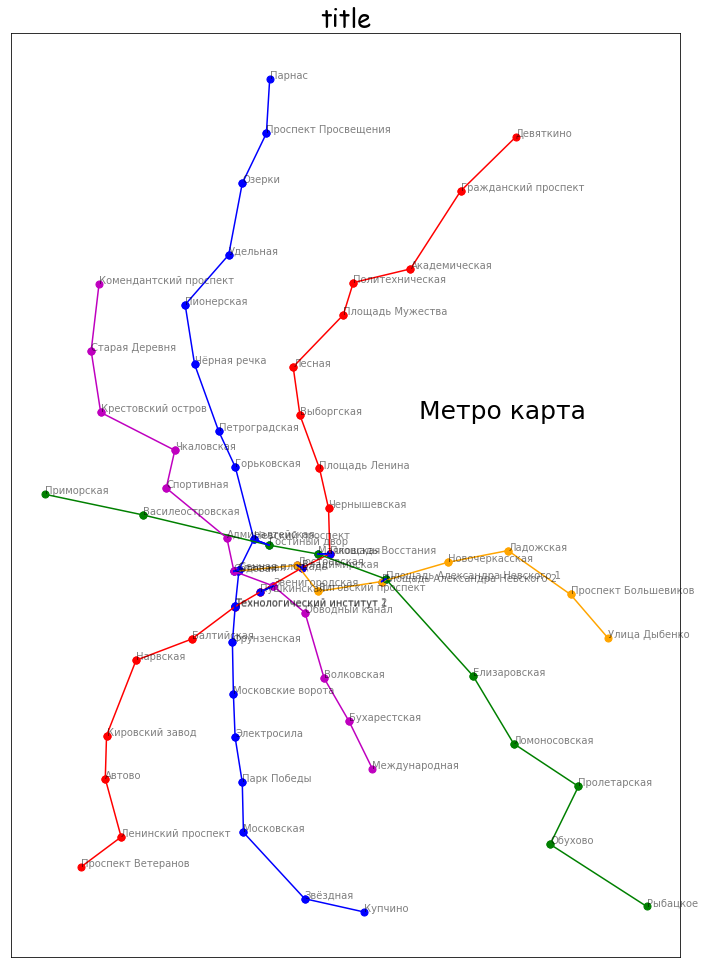

In [119]:
plt.figure(figsize=[12,17])
# plt.scatter(lons, lats, 100, 'r')

for connection in connections_ind:
    st1, st2 = connection
    st1_n, st2_n = stations[st1], stations[st2]
    color = 'b'
    for ind, line in enumerate(lines):
        if st1_n.lower() in line and st2_n.lower() in line:
            color = lines_d[ind]
    plt.plot([lons[st1], lons[st2]], [lats[st1], lats[st2]], '-', color=color)
    plt.scatter([lons[st1], lons[st2]], [lats[st1], lats[st2]], 50, color=color)
    
for inter in inters:
    st1, st2 = inter
    plt.plot([lons[st1], lons[st2]], [lats[st1], lats[st2]], '-', color='b')
    
for ind, station in enumerate(stations):
    plt.text(lons[ind], lats[ind], station, fontsize=10, alpha=0.5)
    
csfont = {'fontname':'Comic Sans MS', 'fontsize' : 25}
hfont = {'fontname':'Helvetica', 'fontsize' : 25}

plt.title('title',**csfont)
plt.text(30.40, 59.97, '–ú–µ—Ç—Ä–æ –∫–∞—Ä—Ç–∞', **hfont)
plt.xticks([])
plt.yticks([])
plt.show()

## –ê–Ω–∞–ª–∏–∑, —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã

–ü–æ–≤—Ç–æ—Ä—é –≤–æ–ø—Ä–æ—Å—ã:

- –ö–∞–∫ —á–∞—Å—Ç–æ –∑–∞–∫—Ä—ã–≤–∞–ª–∏—Å—å –≤ –ø—Ä–æ—à–ª–æ–º –≥–æ–¥—É –∫–∞–∫–∏–µ —Å—Ç–∞–Ω—Ü–∏–∏? (quess: —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–µ –∏ —Å–∞–º—ã–µ –∫–æ–Ω–µ—á–Ω—ã–µ —á–∞—â–µ –≤—Å–µ–≥–æ)
- –Ω–∞ —Å–∫–æ–ª—å–∫–æ –º–∏–Ω—É—Ç –∫–∞–∫–∞—è? (quess: –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ –ø–æ –Ω–∞—Ä–∞—Å—Ç–∞—é—â–µ–π, –¥–æ 1.5 —á–∞—Å–æ–≤)
- —Å–∫–æ–ª—å–∫–æ –º–µ–∂–¥—É –∑–∞–∫—Ä—ã—Ç–∏–µ–º –∏ –ø–æ—Å—Ç–æ–º –≤ —Ç–µ–ª–µ–≥—Ä–∞–º–µ (quess: 5-10)
- –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫—Ä—ã—Ç—ã—Ö –∑–∞ –¥–µ–Ω—å? (quess: –≤—Å–µ –∏–ª–∏ 12)
- —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–æ "–ø–∞–¥–µ–Ω–∏–µ", "—Ñ—É—Ç–±–æ–ª", "—Ö–æ–∫–∫–µ–π", "–Ω–µ–∏—Å–ø—Ä–∞–≤–Ω–æ—Å—Ç—å"

### –ü—Ä–æ—Å–º–æ—Ç—Ä—ã

–ü–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –∫–∞–Ω–∞–ª–∞:

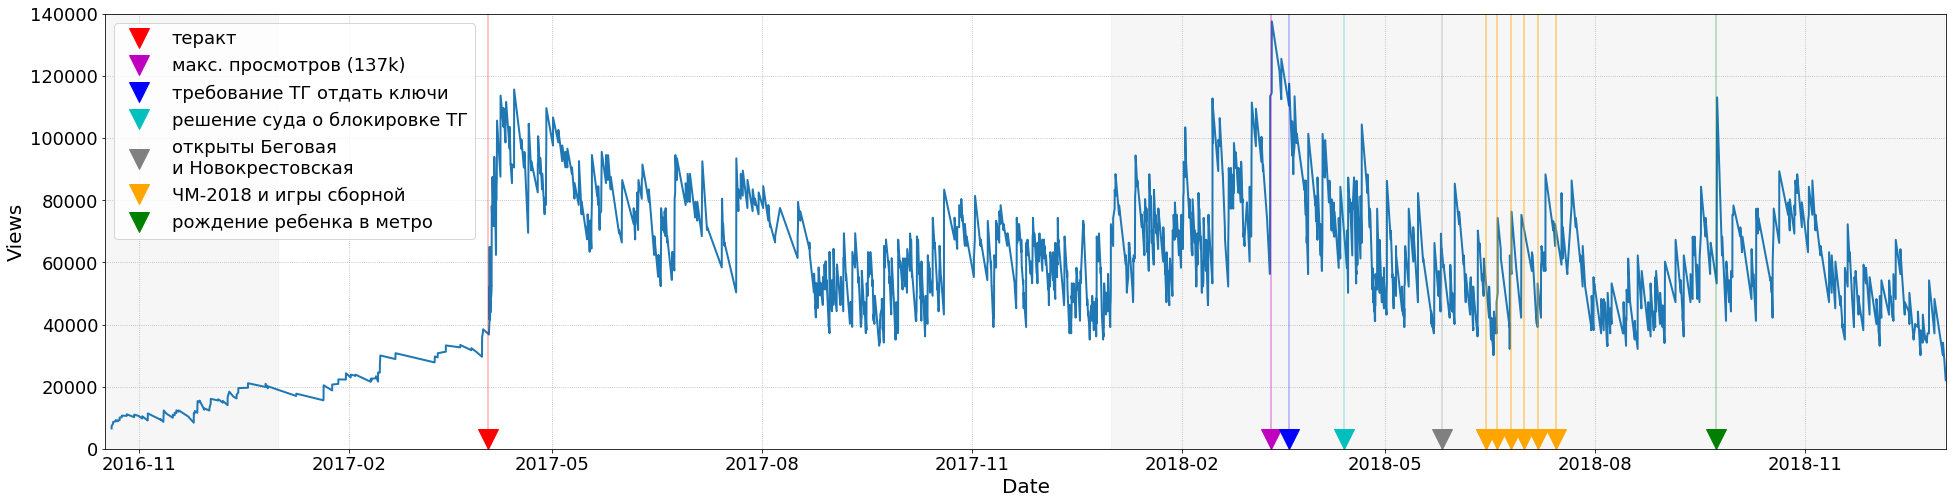

In [162]:
fig = plt.figure(figsize=[33, 8])
plt.plot([pytz.utc.localize(l.date).astimezone(user_timezone) for l in orig_messages], [l.views for l in orig_messages],'-', lw=2)

plt.axvline(x = datetime.date(2017, 4, 3), color = 'r', alpha=0.3) # —Ç–µ—Ä–∞–∫—Ç
plt.plot(datetime.date(2017, 4, 3), 3000, 'v', label='—Ç–µ—Ä–∞–∫—Ç', color='r', ms=20)

# plt.axvline(x = datetime.date(2018, 1, 1), color = 'b', alpha=0.6) # —Å—Ç–∞—Ä—Ç –Ω–æ–≤–æ–≥–æ –≥–æ–¥–∞
plt.fill_between([datetime.date(2018, 1, 1), datetime.date(2019, 1, 1)], [0, 0], [140000, 140000], color='grey', alpha=0.07)
plt.fill_between([datetime.date(2016, 10, 17), datetime.date(2017, 1, 1)], [0, 0], [140000, 140000], color='grey', alpha=0.07)

plt.axvline(x = datetime.date(2018, 3, 12), color = 'm', alpha=0.4)
plt.plot(datetime.date(2018, 3, 12), 3000, 'v', label='–º–∞–∫—Å. –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ (137k)', color='m', ms=20)

plt.axvline(x = datetime.date(2018, 3, 20), color = 'b', alpha=0.3)
plt.plot(datetime.date(2018, 3, 20), 3000, 'v', label='—Ç—Ä–µ–±–æ–≤–∞–Ω–∏–µ –¢–ì –æ—Ç–¥–∞—Ç—å –∫–ª—é—á–∏', color='b', ms=20)

plt.axvline(x = datetime.date(2018, 4, 13), color = 'c', alpha=0.3)
plt.plot(datetime.date(2018, 4, 13), 3000, 'v', label='—Ä–µ—à–µ–Ω–∏–µ —Å—É–¥–∞ –æ –±–ª–æ–∫–∏—Ä–æ–≤–∫–µ –¢–ì', color='c', ms=20)

plt.axvline(x = datetime.date(2018, 5, 26), color = 'grey', alpha=0.3)
plt.plot(datetime.date(2018, 5, 26), 3000, 'v', label='–æ—Ç–∫—Ä—ã—Ç—ã –ë–µ–≥–æ–≤–∞—è \n–∏ –ù–æ–≤–æ–∫—Ä–µ—Å—Ç–æ–≤—Å–∫–∞—è', color='grey', ms=20)


plt.axvline(x = datetime.date(2018, 6, 14), color = 'orange', alpha=0.4, lw=2) # —Å—Ç–∞—Ä—Ç –ß–ú
# plt.text(datetime.date(2018, 6, 14), 0, '–ß–ú-2018', rotation='30', fontsize=20)
plt.plot(datetime.date(2018, 6, 14), 3000, 'v', label='–ß–ú-2018 –∏ –∏–≥—Ä—ã —Å–±–æ—Ä–Ω–æ–π', color='orange', ms=20)
plt.axvline(x = datetime.date(2018, 6, 19), color = 'orange', alpha=0.4, lw=2) # —Å—Ç–∞—Ä—Ç –ß–ú
plt.axvline(x = datetime.date(2018, 7, 1), color = 'orange', alpha=0.4, lw=2) # —Å—Ç–∞—Ä—Ç –ß–ú
plt.axvline(x = datetime.date(2018, 6, 25), color = 'orange', alpha=0.4, lw=2) # —Å—Ç–∞—Ä—Ç –ß–ú
plt.axvline(x = datetime.date(2018, 7, 7), color = 'orange', alpha=0.4, lw=2) # —Å—Ç–∞—Ä—Ç –ß–ú

plt.axvline(x = datetime.date(2018, 7, 15), color = 'orange', alpha=0.4, lw=2) # —Å—Ç–∞—Ä—Ç –ß–ú
# plt.text(datetime.date(2018, 6, 14), 0, '–ß–ú-2018', rotation='30', fontsize=20)
plt.plot([datetime.date(2018, 7, 15), datetime.date(2018, 6, 14), datetime.date(2018, 6, 19), datetime.date(2018, 7, 1), datetime.date(2018, 6, 25), datetime.date(2018, 7, 7)], [3000]*6 , 'v', color='orange', ms=20)


plt.axvline(x = datetime.date(2018, 9, 23), color = 'g', alpha=0.3)
plt.plot(datetime.date(2018, 9, 23), 3000, 'v', label='—Ä–æ–∂–¥–µ–Ω–∏–µ —Ä–µ–±–µ–Ω–∫–∞ –≤ –º–µ—Ç—Ä–æ', color='g', ms=20)


plt.ylabel('Views', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.grid()
plt.xlim(datetime.date(2016, 10, 17), datetime.date(2019, 1, 2))
plt.ylim(0, 140000)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation='0', fontsize=18)
plt.setp(ax.get_yticklabels(), rotation='0', fontsize=18)
plt.legend(loc='upper left', fontsize=18)
plt.savefig('./imgs/view_stats2018.png', bbox_inches = 'tight', pad_inches = 0, dpi=400)
plt.show()

–ü–∏–∫ –≤ —Å–µ–Ω—Ç—è–±—Ä–µ:

In [62]:
user_timezone = pytz.timezone('Europe/Moscow')
for i in range(0, 320):
    msg = orig_messages[-i]
    if msg.views > 100000:
        print(pytz.utc.localize(msg.date).astimezone(user_timezone).strftime("%Y-%m-%d %H:%M:%S") + ' ' + msg.message + ' ' + str(msg.views))

2018-09-23 14:24:31 –£ –Ω–∞—Å —Ö–æ—Ä–æ—à–∞—è –Ω–æ–≤–æ—Å—Ç—å! –ù–∞ —Å—Ç. –¢–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–π –∏–Ω—Å—Ç–∏—Ç—É—Ç –≤ 13.45 —Ä–æ–¥–∏–ª—Å—è –º–∞–ª—å—á–∏–∫ üë∂ –ø–æ–º–æ—â—å –≤ –±—ã—Å—Ç—Ä—ã—Ö —Ä–æ–¥–∞—Ö –æ–∫–∞–∑–∞–ª–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ —Å—Ç–∞–Ω—Ü–∏–∏. –°–µ–π—á–∞—Å –º–∞–ª—ã—à –∏ –º–∞–º–∞ –≤ –±–æ–ª—å–Ω–∏—Ü–µ –∏ —Å –Ω–∏–º–∏ –≤—Å–µ —Ö–æ—Ä–æ—à–æ! –≠—Ç–æ –ø–µ—Ä–≤—ã–π –º–µ—Ç—Ä–æ–º–∞–ª—ã—à, –∫–æ—Ç–æ—Ä—ã–π –ø–æ—è–≤–∏–ª—Å—è –Ω–∞ —Å–≤–µ—Ç –≤ –ü–µ—Ç–µ—Ä–±—É—Ä–≥—Å–∫–æ–π  –ø–æ–¥–∑–µ–º–∫–µ –∑–∞ –±–æ–ª–µ–µ –ø–æ–ª—É–≤–µ–∫–æ–≤—É—é –∏—Å—Ç–æ—Ä–∏—é! 113138


–ú–∞–∫—Å–∏–º—É–º –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ (137607) —É —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ —Ä—è–¥–æ–≤–æ–≥–æ —Å–æ–æ–±—â–µ–Ω–∏—è:

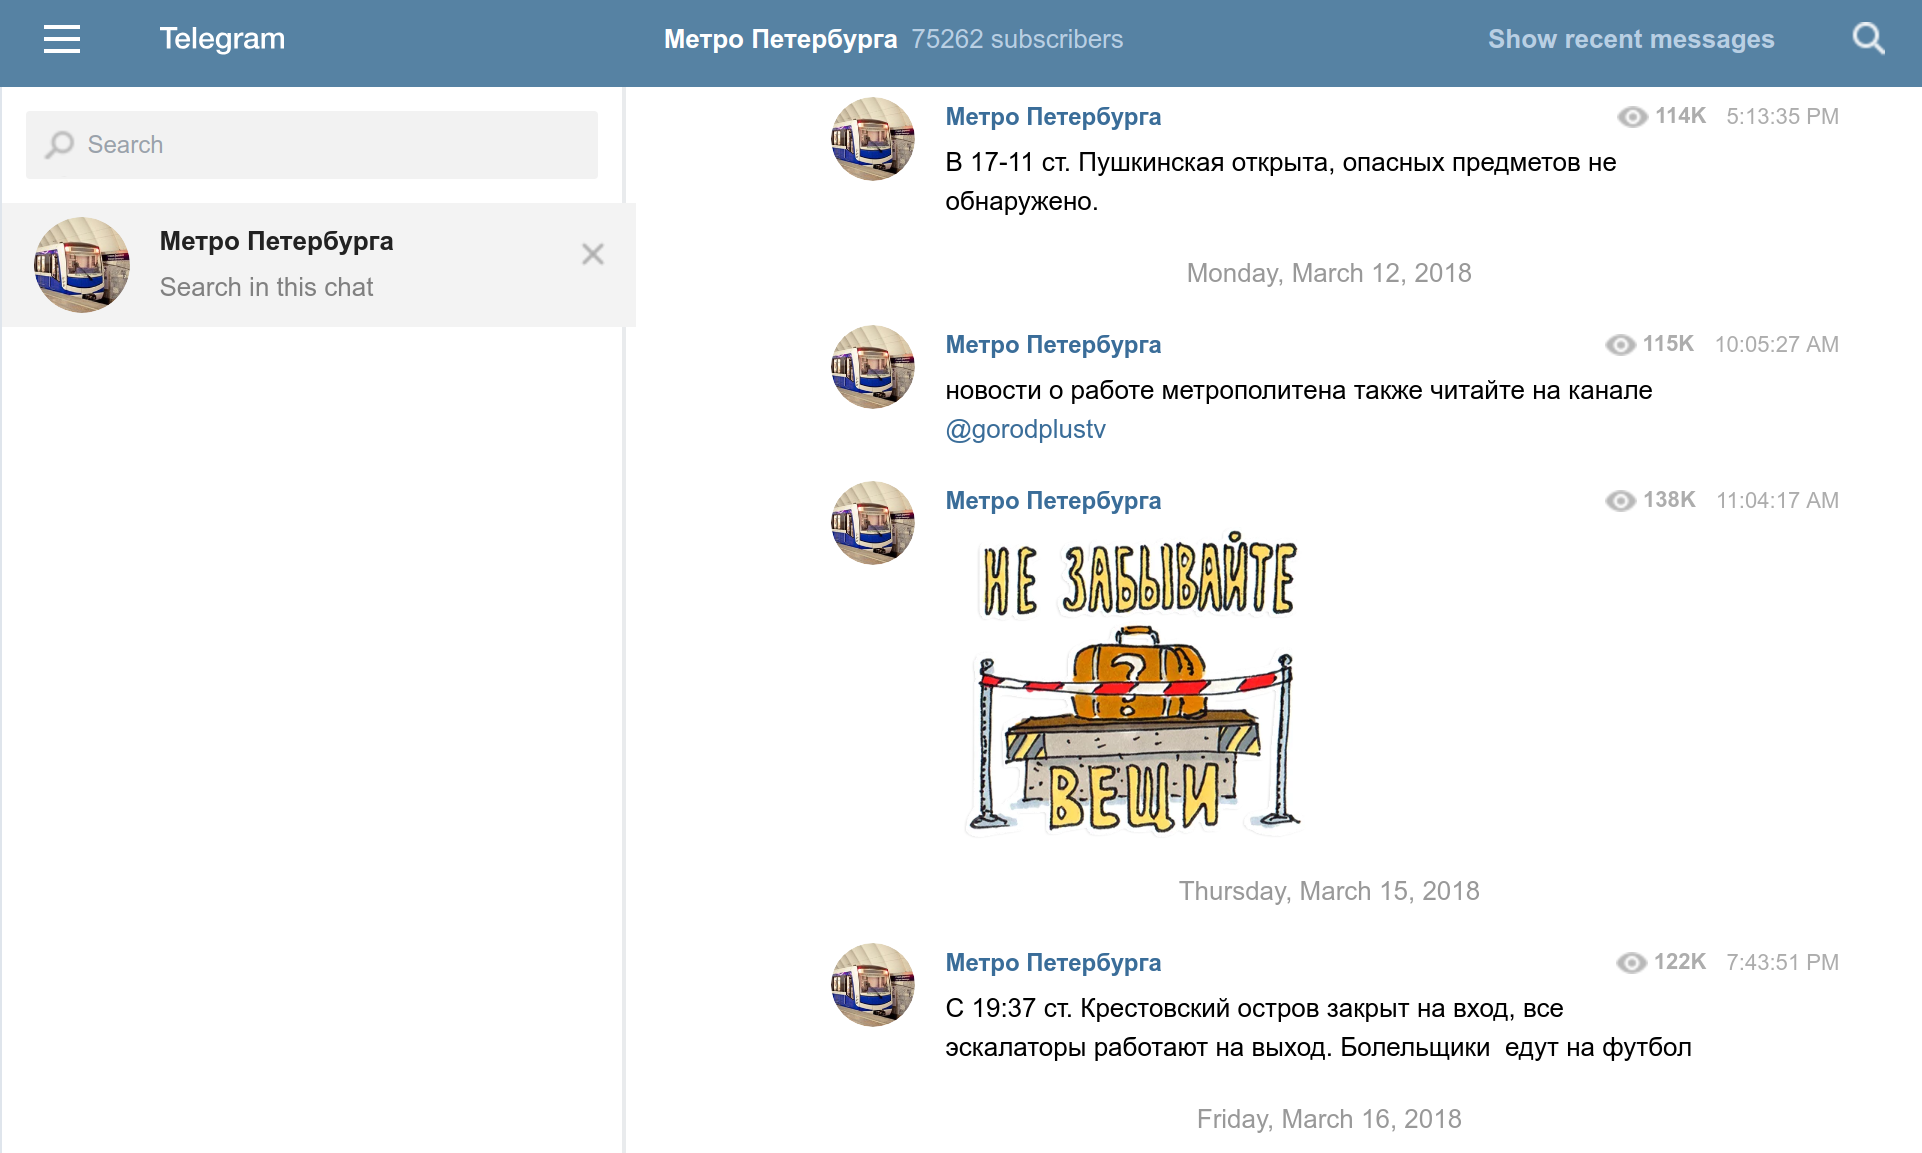

In [81]:
Image('./imgs/max_views.png', width=1000)

### –ó–∞–¥–µ—Ä–∂–∫–∞ –º–µ–∂–¥—É –∑–∞–∫—Ä—ã—Ç–∏–µ–º –∏ —Å–æ–æ–±—â–µ–Ω–∏–µ–º

—Å–∫–æ–ª—å–∫–æ –º–µ–∂–¥—É –∑–∞–∫—Ä—ã—Ç–∏–µ–º/—Å–æ–±—ã—Ç–∏–µ–º –∏ –ø–æ—Å—Ç–æ–º –≤ —Ç–µ–ª–µ–≥—Ä–∞–º–µ (quess: 5-10)

In [199]:
post_delay = []
for ind, entity in enumerate(extracted_data):
    text, i, actt, sts, tts, stat = entity
    actual_date = datetime.datetime.strptime(actt, "%Y-%m-%d %H:%M:%S")
#     hour, minute = actual_date.hour, actual_date.minute
    hour, minute = None, None
    if tts:
        try:
            if '.' in tts[0]:
                hour, minute = tts[0].split('.')
            elif '-' in tts[0]:
                hour, minute = tts[0].split('-')
            elif ':' in tts[0]:
                hour, minute = tts[0].split(':')
        except Exception:
            print(tts)
    if hour is not None and minute is not None:
        text_date = actual_date.replace(hour=int(hour), minute=int(minute), second=actual_date.second)
        post_delay.append((actual_date - text_date).total_seconds()/60.)
        
len(post_delay)

824

(0, 128.09999999999999)

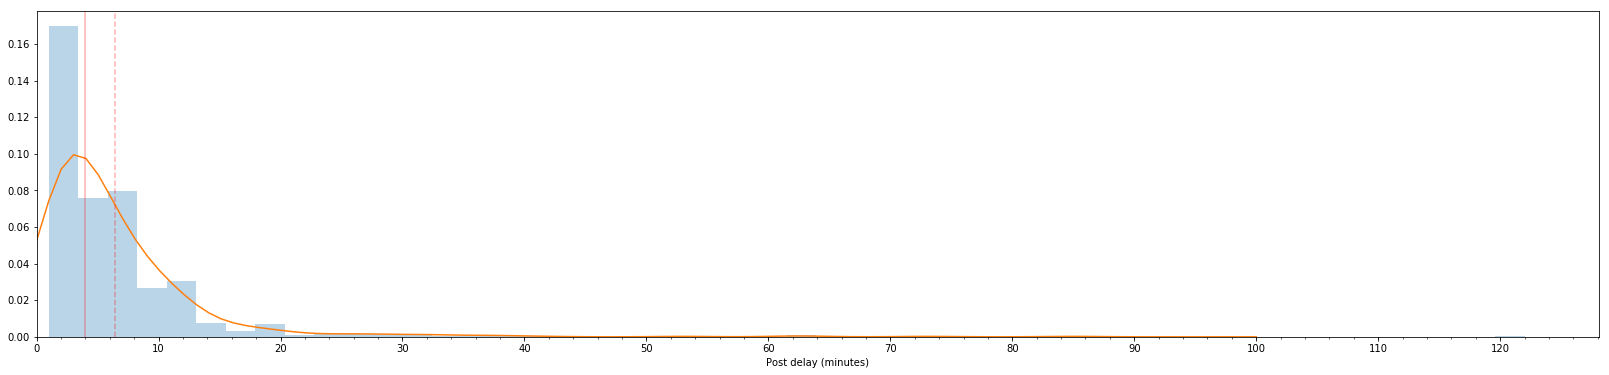

In [214]:
from scipy import stats
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

minorLocator = MultipleLocator(2)
majorLocator = MultipleLocator(10)

post_delay = np.array(post_delay)
post_delay = post_delay[post_delay > 0]

kde = stats.gaussian_kde(post_delay)
xx = np.linspace(0, 100, 100)

fig, ax = plt.subplots(figsize=(28,6))
ax.hist(post_delay, normed=True, bins=50, alpha=0.3)
ax.plot(xx, kde(xx))
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
plt.xlabel('Post delay (minutes)')
plt.axvline(x=np.median(post_delay), ls='-', color='r', alpha=0.3)
plt.axvline(x=np.mean(post_delay), ls='--', color='r', alpha=0.3)
plt.xlim(0)

–ù–µ–ø–ª–æ—Ö–æ–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç, –º–µ–Ω—å—à–µ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º–æ–≥–æ.

### –ö–∞–∫–∏–µ –∑–∞–∫—Ä—ã–≤–∞–ª–∏—Å—å —á–∞—â–µ –≤—Å–µ–≥–æ

–ö–∞–∫ —á–∞—Å—Ç–æ –∑–∞–∫—Ä—ã–≤–∞–ª–∏—Å—å –≤ –ø—Ä–æ—à–ª–æ–º –≥–æ–¥—É –∫–∞–∫–∏–µ —Å—Ç–∞–Ω—Ü–∏–∏? (quess: —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–µ –∏ —Å–∞–º—ã–µ –∫–æ–Ω–µ—á–Ω—ã–µ —á–∞—â–µ –≤—Å–µ–≥–æ)

In [218]:
station_mentions = {}
for ind, entity in enumerate(extracted_data):
    text, i, actt, sts, tts, stat = entity
    for st in sts:
        if st in station_mentions.keys():
            station_mentions[st] += 1
        else:
            station_mentions[st] = 1

In [260]:
for k, v in sorted(station_mentions.items(), key=lambda l: (l[1],l[0]), reverse=True): print(k, v)

–ü–ª–æ—â–∞–¥—å –í–æ—Å—Å—Ç–∞–Ω–∏—è 66
–ö—Ä–µ—Å—Ç–æ–≤—Å–∫–∏–π –æ—Å—Ç—Ä–æ–≤ 52
–ú–∞—è–∫–æ–≤—Å–∫–∞—è 48
–ù–µ–≤—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç 43
–î–æ—Å—Ç–æ–µ–≤—Å–∫–∞—è 42
–í–ª–∞–¥–∏–º–∏—Ä—Å–∫–∞—è 42
–°–ø–∞—Å—Å–∫–∞—è 35
–õ–∞–¥–æ–∂—Å–∫–∞—è 35
–°—Ç–∞—Ä–∞—è –î–µ—Ä–µ–≤–Ω—è 33
–ì–æ—Å—Ç–∏–Ω—ã–π –¥–≤–æ—Ä 32
–ê–≤—Ç–æ–≤–æ 30
–°–µ–Ω–Ω–∞—è –ø–ª–æ—â–∞–¥—å 27
–°–∞–¥–æ–≤–∞—è 27
–ü—Ä–æ—Å–ø–µ–∫—Ç –ë–æ–ª—å—à–µ–≤–∏–∫–æ–≤ 27
–ü–ª–æ—â–∞–¥—å –õ–µ–Ω–∏–Ω–∞ 26
–ü—É—à–∫–∏–Ω—Å–∫–∞—è 25
–ü—Ä–æ—Å–ø–µ–∫—Ç –ü—Ä–æ—Å–≤–µ—â–µ–Ω–∏—è 25
–ê–¥–º–∏—Ä–∞–ª—Ç–µ–π—Å–∫–∞—è 25
–ü–∏–æ–Ω–µ—Ä—Å–∫–∞—è 24
–¢–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–π –∏–Ω—Å—Ç–∏—Ç—É—Ç 1 22
–¢–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–π –∏–Ω—Å—Ç–∏—Ç—É—Ç 2 21
–ü—Ä–∏–º–æ—Ä—Å–∫–∞—è 20
–ü–µ—Ç—Ä–æ–≥—Ä–∞–¥—Å–∫–∞—è 20
–ó–≤–µ–Ω–∏–≥–æ—Ä–æ–¥—Å–∫–∞—è 20
–ì—Ä–∞–∂–¥–∞–Ω—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç 20
–ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è 18
–£–¥–µ–ª—å–Ω–∞—è 18
–ß—ë—Ä–Ω–∞—è —Ä–µ—á–∫–∞ 17
–í–∞—Å–∏–ª–µ–æ—Å—Ç—Ä–æ–≤—Å–∫–∞—è 17
–ê–∫–∞–¥–µ–º–∏—á–µ—Å–∫–∞—è 16
–ì–æ—Ä—å–∫–æ–≤—Å–∫–∞—è 15
–ú–æ—Å–∫–æ–≤—Å–∫–∞—è 14
–õ–∏–≥–æ–≤—Å–∫–∏–π –ø

–¢—É—Ç –Ω–∞–¥–æ –¥–µ–ª–∏—Ç—å –Ω–∞ –¥–≤–∞, –Ω–æ –¥–ª—è –∫–∞—Ä—Ç—ã —ç—Ç–æ –Ω–µ –≤–∞–∂–Ω–æ.

–ö–∞—Ä—Ç–∞:

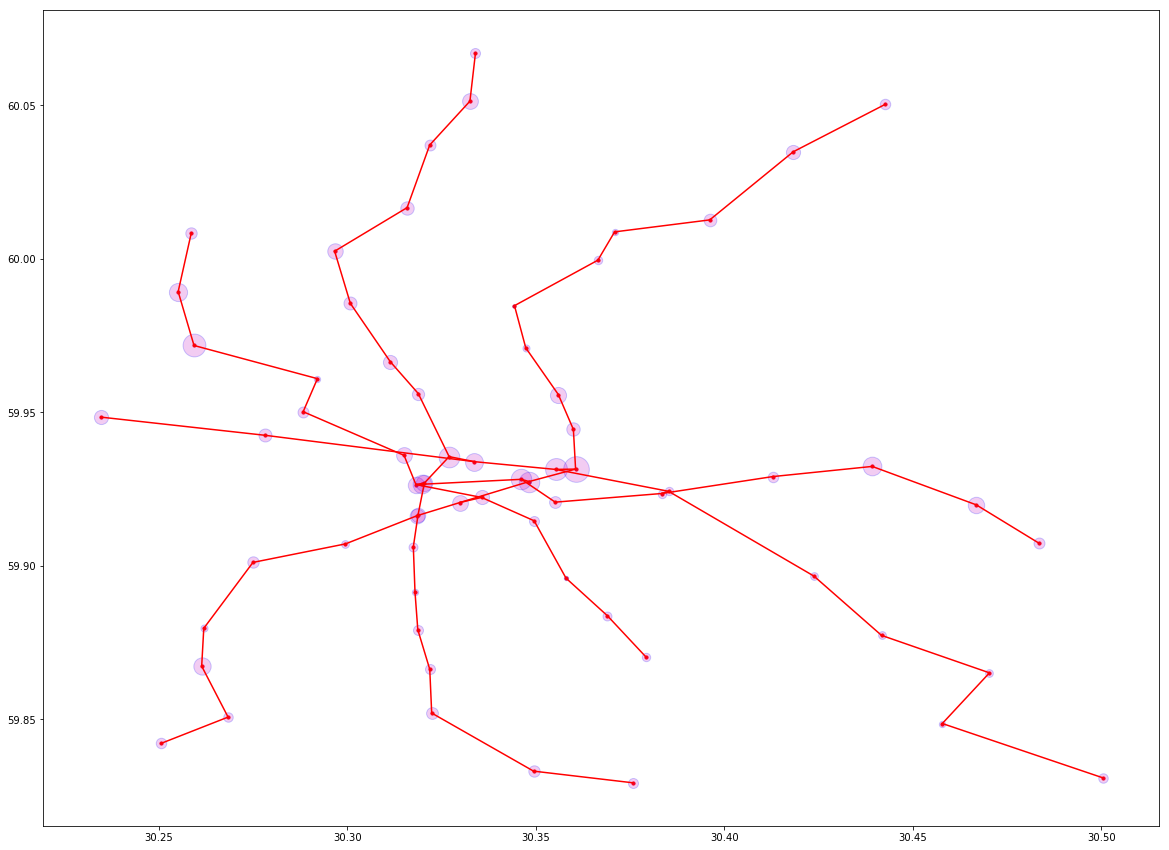

In [223]:
plt.figure(figsize=[20,15])
plt.scatter(lons, lats, 10, 'r')
for connection in connections_ind:
    st1, st2 = connection
    plt.plot([lons[st1], lons[st2]], [lats[st1], lats[st2]], '-', color='r')
    
for ind,station in enumerate(stations):
    if station in station_mentions.keys():
        plt.scatter(lons[ind], lats[ind], 10*station_mentions[station], 'm', edgecolor='b', alpha=0.2)

–ü—Ä–æ –∫—Ä–∞–π–Ω–∏–µ —è –Ω–µ —É–≥–∞–¥–∞–ª, –∞ –ø—Ä–æ —Ü–µ–Ω—Ç—Ä –∏ —Ç–∞–∫ –ø–æ–Ω—è—Ç–Ω–æ.

*–ù–∞ —Å–∞–º–æ–º –¥–µ–ª–µ —ç—Ç–æ —Å–∫–æ—Ä–µ–µ —É–ø–æ–º–∏–Ω–∞–Ω–∏—è, –∞ –Ω–µ —Ç–æ—á–Ω–æ–µ —á–∏—Å–ª–æ, –Ω–æ —Å–≤—è–∑—å –¥—É–º–∞—é —Å–∞–º–∞—è –ø—Ä—è–º–∞—è.*

### –ù–∞ —Å–∫–æ–ª—å–∫–æ –∑–∞–∫—Ä—ã–≤–∞–ª–∏—Å—å

–Ω–∞ —Å–∫–æ–ª—å–∫–æ –º–∏–Ω—É—Ç –∫–∞–∫–∞—è? (quess: –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ –ø–æ –Ω–∞—Ä–∞—Å—Ç–∞—é—â–µ–π, –¥–æ 1.5 —á–∞—Å–æ–≤)

In [23]:
def get_text_time(actt, tts):
    actual_date = datetime.datetime.strptime(actt, "%Y-%m-%d %H:%M:%S")
    hour, minute = actual_date.hour, actual_date.minute
    if tts:
        try:
            if '.' in tts[0]:
                hour, minute = tts[0].split('.')
            elif '-' in tts[0]:
                hour, minute = tts[0].split('-')
            elif ':' in tts[0]:
                hour, minute = tts[0].split(':')
        except Exception:
            print(tts)
    if hour is not None and minute is not None:
        text_date = actual_date.replace(hour=int(hour), minute=int(minute), second=actual_date.second)
    return actual_date, text_date

closed_time = []
for station in stations:
    station_messages = []
    station_ids = []
    for ind, entity in enumerate(extracted_data):
        text, i, actt, sts, tts, stat = entity

        if station in sts and stat is not 'UNKNOWN' and i not in station_ids:
            station_messages.append([tts, stat, actt, text, i])
            station_ids.append(i)

    status_sum = ''            
    actual_date = datetime.datetime.strptime(station_messages[-1][2], "%Y-%m-%d %H:%M:%S")
    status = ''
    
    for i in range(len(station_messages))[::-1]:
        tts, stat, actt, text, _ = station_messages[i]
        date = datetime.datetime.strptime(station_messages[i][2], "%Y-%m-%d %H:%M:%S")
        
        if actual_date.date() == date.date() or actual_date.date() == (date - datetime.timedelta(hours=1)).date():
            msg = station_messages[i]
            if msg[1] == 'CLOSE':
                status_sum = status_sum + 'C'
            elif msg[1] == 'OPEN':
                if status_sum:
                    if status_sum[-1] == 'C':
                        status_sum = status_sum[:-1]
                        
                        tts1, stat1, actt1, text1, i1 = station_messages[i+1]
                        closed_time.append([station, get_text_time(actt1,tts1)[1], get_text_time(actt,tts)[1]])
#                         if (get_text_time(actt,tts)[1]-get_text_time(actt1,tts1)[1]).total_seconds()/60. > 250:
#                             print(actt,tts,actt1,tts1)
                    else:
                        status_sum = status_sum + 'O'
                else:
                    status_sum = status_sum + 'O'
        else:            
            actual_date = date
            if status_sum:
                status = status + '|' + status_sum
            status_sum = 'C' if station_messages[i][1] == 'CLOSE' else 'O'

In [24]:
len(closed_time)

431

In [25]:
closed_time_s = np.array([(l[2]-l[1]).total_seconds()/60. for l in closed_time])

In [26]:
closed_time_s = sorted(closed_time_s)

(0, 165.80500000000004)

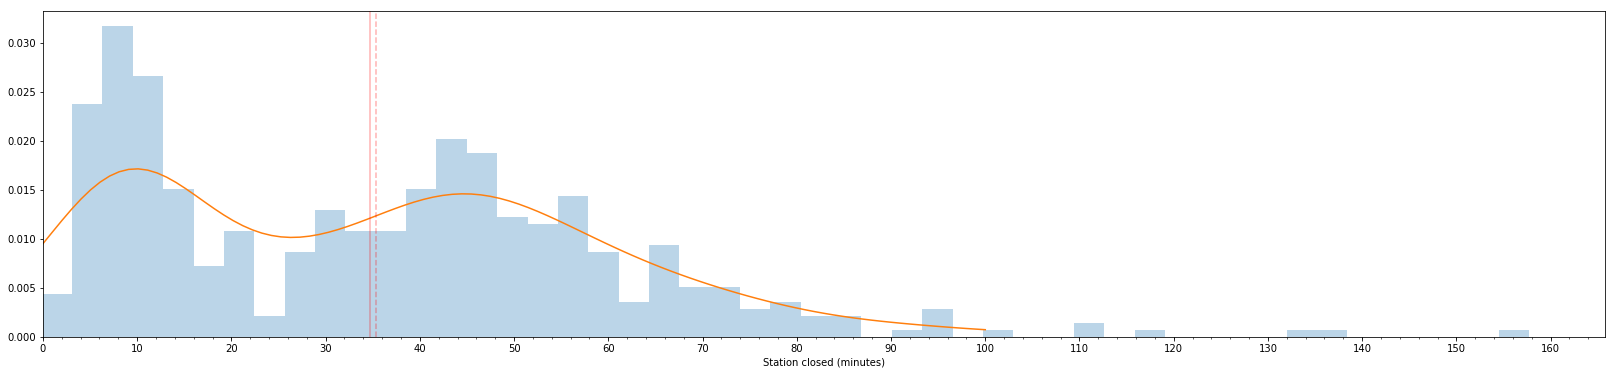

In [27]:
from scipy import stats
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

minorLocator = MultipleLocator(2)
majorLocator = MultipleLocator(10)

kde = stats.gaussian_kde(closed_time_s[:-1])
xx = np.linspace(0, 100, 100)

fig, ax = plt.subplots(figsize=(28,6))
ax.hist(closed_time_s[:-1], normed=True, bins=50, alpha=0.3)
ax.plot(xx, kde(xx))
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
plt.xlabel('Station closed (minutes)')
plt.axvline(x=np.median(closed_time_s[:-1]), ls='-', color='r', alpha=0.3)
plt.axvline(x=np.mean(closed_time_s[:-1]), ls='--', color='r', alpha=0.3)
plt.xlim(0)

–°—Ç—Ä–∞–Ω–Ω–æ —á—Ç–æ —Ç–∞–∫ –º–Ω–æ–≥–æ –±—ã—Å—Ç—Ä–æ –æ—Ç–∫—Ä—ã–≤—à–∏—Ö—Å—è —Å—Ç–∞–Ω—Ü–∏–π. –Ø –¥—É–º–∞—é –≤ —ç—Ç–æ–º –ø—É–Ω–∫—Ç–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–∞—è –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å.

–ù–æ –≤ —Ü–µ–ª–æ–º –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –µ—Å—Ç—å –º–Ω–æ–≥–æ –±—ã—Å—Ç—Ä–æ –æ—Ç–∫—Ä—ã–≤—à–∏—Ö—Å—è - –Ω–∞–ø—Ä–∏–º–µ—Ä 26 –º–∞—Ä—Ç–∞ 2017:

> –í 16-00 —Å—Ç. –ö—Ä–µ—Å—Ç–æ–≤—Å–∫–∏–π –æ—Å—Ç—Ä–æ–≤ –∑–∞–∫—Ä—ã—Ç–∞, –ø–æ–µ–∑–¥–∞ —Å–ª–µ–¥—É—é—Ç –±–µ–∑ –æ—Å—Ç–∞–Ω–æ–≤–∫–∏. –í –≤–µ—Å—Ç–∏–±—é–ª–µ –±–µ—Å—Ö–æ–∑–Ω—ã–π –ø—Ä–µ–¥–º–µ—Ç.

> 16-05 —Å—Ç. –ö—Ä–µ—Å—Ç–æ–≤—Å–∫–∏–π –æ—Å—Ç—Ä–æ–≤ –æ—Ç–∫—Ä—ã—Ç–∞.

–ò —Å—Ö–æ–¥–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–æ–≤ —è –≤–∏–¥–µ–ª –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ - —á–∞—Å—Ç–æ —ç—Ç–æ –ø–∞–¥–µ–Ω–∏–µ –Ω–∞ –ø—É—Ç–∏.

TODO –ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ –∫–æ–Ω–µ—á–Ω–æ –±—ã–ª–æ –±—ã –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –∫–∞–∫ —ç—Ç–æ —á–∏—Å–ª–æ –º–µ–Ω—è–µ—Ç—Å—è —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º. 

### –ú–∞–∫—Å–∏–º—É–º –∑–∞–∫—Ä—ã—Ç–æ –∑–∞ –¥–µ–Ω—å —Ä–∞–∑

–°–∫–æ–ª—å–∫–æ –º–∞–∫—Å–∏–º—É–º –±—ã–ª–æ –∑–∞–∫—Ä—ã—Ç–æ (—Ä–∞–∑, —Ç.–µ. –æ–¥–Ω–∞ —Å—Ç–∞–Ω—Ü–∏—è –º–æ–∂–µ—Ç —Å—á–∏—Ç–∞—Ç—å—Å—è –±–æ–ª—å—à–µ –æ–¥–Ω–æ–≥–æ —Ä–∞–∑–∞) –≤ –¥–µ–Ω—å?

In [28]:
closed_per_day = {}
for st, ct, ot in closed_time:
    date = ct.date()
    if date in closed_per_day.keys():
        closed_per_day[date] += 1
    else:
        closed_per_day[date] = 1

In [30]:
closed_per_day = sorted(closed_per_day.items())

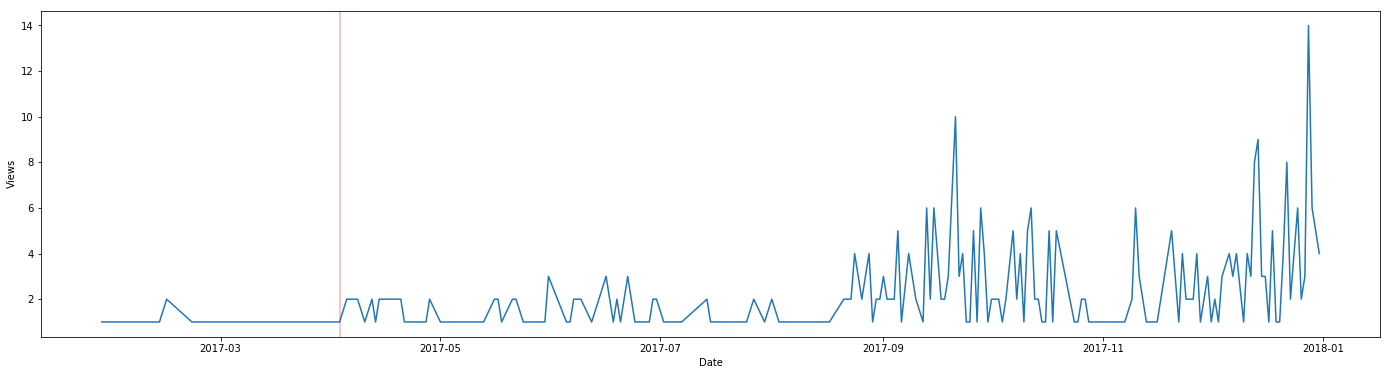

In [39]:
fig = plt.figure(figsize=[24, 6])
plt.plot(list(zip(*closed_per_day))[0], list(zip(*closed_per_day))[1], '-')
plt.axvline(x = datetime.date(2017, 4, 3), color = 'r', alpha=0.3)
plt.ylabel('Views')
plt.xlabel('Date')

–ü–æ—Ä—è–¥–æ–∫ —É–≥–∞–¥–∞–Ω, –æ—á–µ–Ω—å –±–ª–∏–∑–∫–æ. –¢—É—Ç –∫–æ–Ω–µ—á–Ω–æ –Ω—É–∂–Ω—ã –µ—â–µ –ø—Ä–æ—è—Å–Ω–µ–Ω–∏—è. –ü–ª—é—Å –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ —Å –æ–±—â–∏–º —á–∏—Å–ª–æ–º "—É–ø–æ–º–∏–Ω–∞–Ω–∏–π" —ç—Ç–æ –Ω–µ –æ—á–µ–Ω—å —Å–æ–≥–ª–∞—Å—É–µ—Ç—Å—è.

### –í—Ä–µ–º—è –∑–∞–∫—Ä—ã—Ç–∏—è

–í –∫–∞–∫–∏–µ —á–∞—Å—ã —á–∞—â–µ –≤—Å–µ–≥–æ –∑–∞–∫—Ä—ã–≤–∞—é—Ç—Å—è:

In [51]:
sample_date = datetime.datetime.now()
sample_dates = []
for st, ct, ot in closed_time:
    s_date = sample_date.replace(hour=ct.hour, minute=ct.minute, second=ct.second)
    sample_dates.append(s_date)

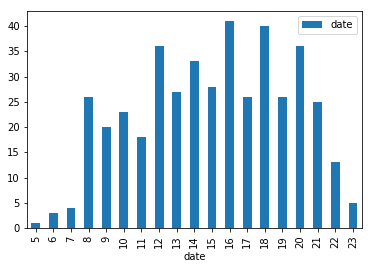

In [74]:
df = pd.DataFrame(data=sample_dates, columns=['date'])
df.groupby(df["date"].dt.hour).count().plot(kind="bar")

–ö–∞–∫–æ–≥–æ-—Ç–æ –ø—Ä—è–º "—á–∞—Å–∞ –ø–∏–∫" –Ω–µ—Ç.

### –î—Ä—É–≥–∏–µ –ø—Ä–∏—á–∏–Ω—ã

—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–æ "–ø–∞–¥–µ–Ω–∏–µ", "—Ñ—É—Ç–±–æ–ª", "—Ö–æ–∫–∫–µ–π", "–Ω–µ–∏—Å–ø—Ä–∞–≤–Ω–æ—Å—Ç—å"

In [40]:
fulltext = ' '.join(corpora)

In [44]:
for word in ["–ø–∞–¥–µ–Ω", "—Ñ—É—Ç–±–æ–ª", "—Ö–æ–∫–∫–µ–π", "–Ω–µ–∏—Å–ø—Ä–∞–≤–Ω"]:
    print(word + ' : ' + str(fulltext.count(word)))

–ø–∞–¥–µ–Ω : 6
—Ñ—É—Ç–±–æ–ª : 9
—Ö–æ–∫–∫–µ–π : 3
–Ω–µ–∏—Å–ø—Ä–∞–≤–Ω : 11


In [48]:
from collections import Counter
words = re.findall('\w+', fulltext.lower())
Counter(words).most_common(20)

[('—Å—Ç', 1004),
 ('–≤', 951),
 ('–Ω–∞', 539),
 ('–æ—Ç–∫—Ä—ã—Ç–∞', 335),
 ('–∑–∞–∫—Ä—ã—Ç–∞', 330),
 ('–∏', 310),
 ('–Ω–µ', 228),
 ('–ø—Ä–µ–¥–º–µ—Ç–æ–≤', 223),
 ('–æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ', 219),
 ('–ø—Ä–µ–¥–º–µ—Ç–∞', 214),
 ('–±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ', 210),
 ('–æ–ø–∞—Å–Ω—ã—Ö', 208),
 ('–∏–∑', 205),
 ('–∑–∞', 201),
 ('–≤—Ö–æ–¥', 175),
 ('–ø–µ—Ä–µ—Ö–æ–¥', 130),
 ('–±–µ—Å—Ö–æ–∑–Ω—ã–π', 119),
 ('–ø—Ä–µ–¥–º–µ—Ç', 105),
 ('20', 103),
 ('–≤—ã—Ö–æ–¥', 98)]

–¢—É—Ç –∫–æ–Ω–µ—á–Ω–æ –Ω–∞–¥–æ –±—ã –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é –ø—Ä–æ–≤–µ—Å—Ç–∏ —Å–∞–º–æ —Å–æ–±–æ–π, –Ω–æ –∫–∞–∂–µ—Ç—Å—è —á—Ç–æ –Ω–∏—á–µ–≥–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ–≥–æ –≤—Å–µ —Ä–∞–≤–Ω–æ –Ω–µ –Ω–∞–π—Ç–∏ (–º–æ–∂–µ—Ç tf-idf, –Ω–æ –Ω–µ —Å–∏–ª—å–Ω–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ).

–æ—Ç–¥–µ–ª—å–Ω–æ —É–ø–æ–º—è–Ω—É—Ç—å –ß–ú?

## Appendix

*–ü–æ–¥–≤–∞–ª –∑–∞–≥–æ—Ç–æ–≤–æ–∫ –±–µ–∑ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤*

In [5]:
# TODO: –¥–æ–±–∞–≤–∏—Ç—å
regexp = re.compile("\d?\d—á[ ]?\d\d[ ]?–º–∏–Ω")
re.findall(regexp, '–°—Ç–∞–Ω—Ü–∏—è –≤ 20—á10 –º–∏–Ω –∑–∞–∫—Ä—ã—Ç–∞. –°—Ç–∞–Ω—Ü–∏—è –≤ 15—á 25 –º–∏–Ω –∑–∞–∫—Ä—ã—Ç–∞')

['20—á10 –º–∏–Ω', '15—á 25 –º–∏–Ω']

In [6]:
# TODO: –¥–æ–±–∞–≤–∏—Ç—å
regexp = re.compile("–∑–∞–∫—Ä—ã|–æ—Ç–∫—Ä—ã")
re.findall(regexp, '–í 17-14 —Å—Ç  –í–ª–∞–¥–∏–º–∏—Ä—Å–∫–∞—è –∑–∞–∫—Ä—ã—Ç–∞, –∞ —Å—Ç  –î–æ—Å—Ç–æ–µ–≤—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç–∞.')

['–∑–∞–∫—Ä—ã', '–æ—Ç–∫—Ä—ã']

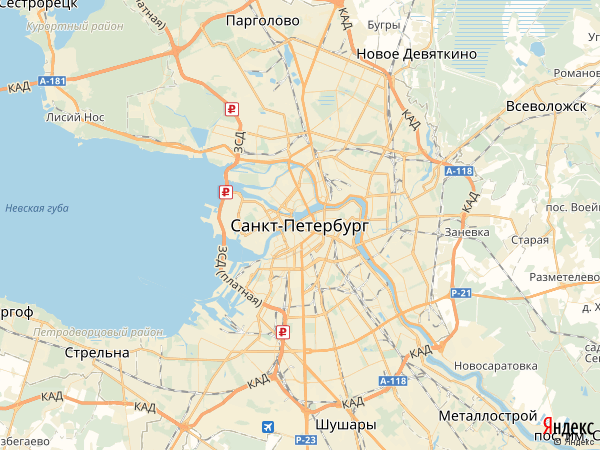

In [226]:
#SPb center
c_lon, c_lat = 30.3159, 59.9391 
#Image radius in degrees
spn = 0.3
spb_map = Image(filename='spb_small.png')
spb_map

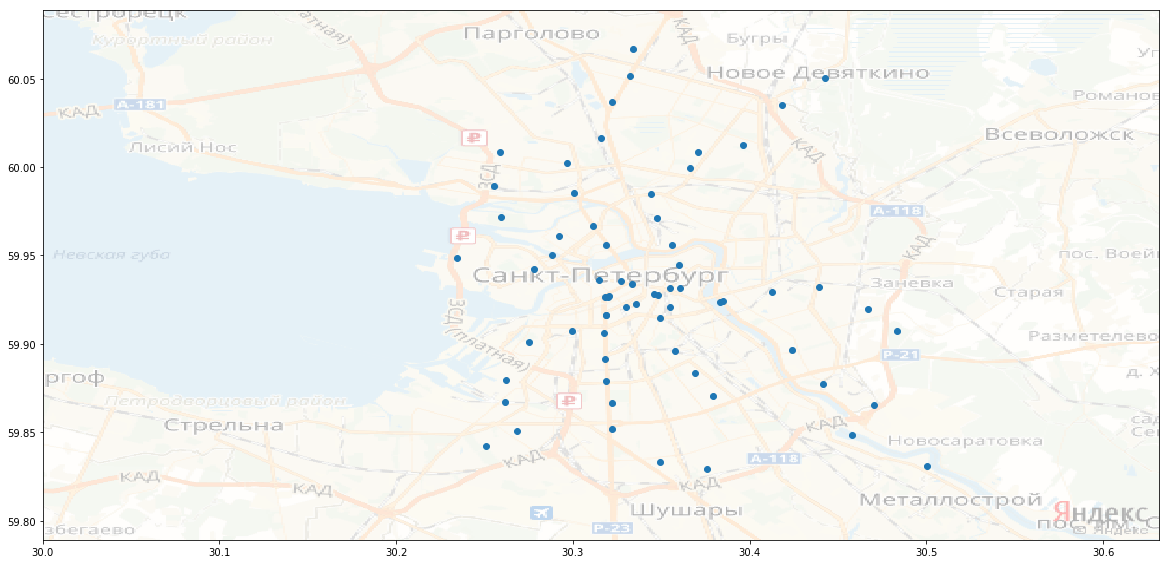

In [253]:
img = mpimg.imread('spb_small.png')
fig = plt.figure(figsize=[20,15])
# plt.scatter([c_lon], [c_lat], color ='red', zorder=1)
plt.scatter(lons, lats, zorder=1)
# plt.imshow(img, zorder=0, extent=[c_lon-spn, c_lon+spn, c_lat-spn, c_lat+spn], alpha=0.3)
Nx = 0.95
Ny = 2.
plt.imshow(img, zorder=0,  extent=[c_lon-spn/Nx, c_lon+spn/Nx, c_lat-spn/Ny, c_lat+spn/Ny], alpha=0.3)
plt.show()

In [302]:
import bokeh
bokeh.io.output_notebook()

Loading BokehJS ...

In [313]:
import pandas as pd
from bokeh.charts import output_file, Chord
from bokeh.io import show
from bokeh.sampledata.les_mis import data
 
# nodes = data['nodes']
# links = data['links']
# groups = [ for l in stations]
nodes = [{'group' : stations.index(l)%4, 'name' : l} for l in stations]
links = [{'source': l[0], 'target': l[1], 'value': 1} for l in connections_ind]
 
nodes_df = pd.DataFrame(nodes)
links_df = pd.DataFrame(links)
 
source_data = links_df.merge(nodes_df, how='left', left_on='source', right_index=True)
source_data = source_data.merge(nodes_df, how='left', left_on='target', right_index=True)
# source_data = source_data[source_data["value"] > 5]
 
chord_from_df = Chord(source_data, source="name_x", target="name_y", value="value")
# output_notebook()
# output_file('chord-diagram-bokeh.html', mode="inline")
show(chord_from_df)

In [ ]:
extracted_data = []

for i in range(0, len(messages)-4):
    msg = messages[i]
#     text = msg.message
    print('#' * 30)
    print(msg.message)
    print('#' * 30)
    
    for sent in sent_tokenize(msg.message.replace('–ü–ª.', '–ø–ª ').replace('–ü—Ä.', '–ø—Ä ').replace('–£–ª.', '—É–ª ').
                              replace('–ø–ª.', '–ø–ª ').replace('–ø—Ä.', '–ø—Ä ').replace('—É–ª.', '—É–ª ').replace('—Å—Ç.', '—Å—Ç ')):

        
        text = sent
        
        if len(text) == 0:
            continue

    #     print('-'*20)
    #     print(text)
        actual_date = pytz.utc.localize(msg.date).astimezone(user_timezone).strftime("%Y-%m-%d %H:%M:%S")
        
        ### search stations

        splitted = text.lower().replace('-', ' ').replace('1,2', '1').replace('–ø–ª.', '–ø–ª ').replace('–ø—Ä.', '–ø—Ä ').replace('—É–ª.', '—É–ª ').replace('—Å—Ç.', '—Å—Ç ').replace('.', '. ').split(' ')
    #     print(splitted)
        short_splitted = ' '.join([l[:6] for l in splitted])
        short_splitted = ' '.join(short_splitted.split())
    #     print(short_splitted)
        found = []
        for ind, signature in enumerate(signatures):
            if signature in short_splitted:
    #             print(stations[ind])
                found.append(stations[ind])
            if signature in another_signatures.keys():
                if another_signatures[signature] in short_splitted:
    #                 print(stations[ind])
                    found.append(stations[ind])
            if signature in another_signatures2.keys():
                if another_signatures2[signature] in short_splitted:
    #                 print(stations[ind])
                    found.append(stations[ind])
        if len(found) == 0:
    #         print('-'*20)
    #         print(text)
    #         print(splitted)
    #         print(short_splitted)
    #         print(set(found))
            for station in stations:
                for word in station.lower().split(' '):
                    if word not in ['–ø—Ä–æ—Å–ø–µ–∫—Ç', '–ø–ª–æ—â–∞–¥—å', '1', '2',  '–∫–∞–Ω–∞–ª']:
                        if word in ' '.join(splitted):
                            found.append(station)
        if found:
            
            print('-'*20)
            print(text)
            print(set(found))
            

            ### time
            regexp = re.compile("\d?\d[.\-:]\d\d")
            msgtime = re.findall(regexp, text)
            
            if len(msgtime) > 2:
                continue 
            
            data = [text, i, actual_date]
            data.append(set(found))
            
            
            if msgtime:
                print(msgtime)
                data.append(msgtime)
            else:
                data.append([])

            ### status
            status = 'UNKNOWN'
            if '–æ—Ç–∫—Ä—ã' in text or '–Ω–µ –∑–∞–∫—Ä—ã' in text or ('–æ–±—ã—á' in text and '—Ä–µ–∂–∏–º' in text):
                status = 'OPEN'
            elif '–∑–∞–∫—Ä—ã' in text:
                status = 'CLOSE'

            if status is not 'UNKNOWN':
                print(status)
            data.append(status)
            
    extracted_data.append(data)

In [15]:
len(extracted_data)

1046

In [16]:
extracted_data[750]

['20-03 —Å—Ç  –ø—Ä –ë–æ–ª—å—à–µ–≤–∏–∫–æ–≤ –∑–∞–∫—Ä—ã—Ç–∞.',
 750,
 '2017-06-07 20:04:21',
 {'–ü—Ä–æ—Å–ø–µ–∫—Ç –ë–æ–ª—å—à–µ–≤–∏–∫–æ–≤'},
 ['20-03'],
 'CLOSE']

In [17]:
complex_messages = []
easy = 0
several_stations = 0
unkn = 0
for ind, entity in enumerate(extracted_data):
#     print(entity)
    text, i, actt, sts, tts, stat = entity
    
    if len(sts) == len(tts) == 1 and stat is not 'UNKNOWN':
        easy += 1
    elif len(sts) > 1 and len(tts) == 1 and stat is not 'UNKNOWN':
        several_stations += 1
    elif stat is 'UNKNOWN':
        unkn += 1
    else:
        pass
    
#     if len(sts) == len(tts) == 1:
    if len(tts) <= 1:
        continue
    else:
        complex_messages.append(entity)

In [18]:
len(complex_messages), easy, several_stations, unkn, easy+several_stations+unkn

(2, 717, 147, 100, 964)

In [19]:
complex_messages

[['–í–æ–ª–∫–æ–≤—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç–∞ –≤ 13-59 –º–∏–Ω, —Å—Ç  –ø–ª  –í–æ—Å—Å—Ç–∞–Ω–∏—è1,2 –æ—Ç–∫—Ä—ã—Ç–∞ –≤ 13-57 –º–∏–Ω.',
  201,
  '2017-12-07 14:06:11',
  {'–í–æ–ª–∫–æ–≤—Å–∫–∞—è', '–ü–ª–æ—â–∞–¥—å –í–æ—Å—Å—Ç–∞–Ω–∏—è'},
  ['13-59', '13-57'],
  'OPEN'],
 ['–í–æ–ª–∫–æ–≤—Å–∫–∞—è –∑–∞–∫—Ä—ã–≤–∞–ª–∞—Å—å –¥–ª—è –æ—Å–º–æ—Ç—Ä–∞ —Å 15.30 –æ—Ç–∫—Ä—ã–ª–∞—Å—å –≤15.36.',
  1044,
  '2016-10-20 15:44:02',
  {'–í–æ–ª–∫–æ–≤—Å–∫–∞—è'},
  ['15.30', '15.36'],
  'OPEN']]

In [20]:
avtovo_messages = []
avtovo_ids = []
for ind, entity in enumerate(extracted_data):
    text, i, actt, sts, tts, stat = entity
    
    if '–ê–≤—Ç–æ–≤–æ' in sts and stat is not 'UNKNOWN' and i not in avtovo_ids:
        avtovo_messages.append([tts, stat, actt, text, i])
        avtovo_ids.append(i)
        
len(avtovo_messages)

32

In [65]:
for i in range(len(avtovo_messages))[::-1]:
    print(avtovo_messages[i])

[['10-48'], 'CLOSE', '2016-12-26 10:55:54', '–°—Ç–∞–Ω—Ü–∏—è –ê–≤—Ç–æ–≤–æ –∑–∞–∫—Ä—ã—Ç–∞ –Ω–∞ –≤—Ö–æ–¥ –∏ –≤—ã—Ö–æ–¥ –≤ 10-48 –±–µ–∑–Ω–∞–¥–∑–æ—Ä–Ω—ã–π –ø—Ä–µ–¥–º–µ—Ç (—Å—É–º–∫–∞) –≤ –≤–µ—Å—Ç–∏–±—é–ª–µ —É –±–∞–Ω–∫–æ–º–∞—Ç–æ–≤.', 972]
[['11-04'], 'OPEN', '2016-12-26 11:10:08', '–°—Ç–∞–Ω—Ü–∏—è –ê–≤—Ç–æ–≤–æ –æ—Ç–∫—Ä—ã—Ç–∞ –≤ 11-04.', 971]
[['11-14'], 'CLOSE', '2016-12-27 11:14:39', '–°—Ç–∞–Ω—Ü–∏—è –ê–≤—Ç–æ–≤–æ –∑–∞–∫—Ä—ã—Ç–∞ –Ω–∞ –≤—Ö–æ–¥ –∏ –≤—ã—Ö–æ–¥ –≤ 11-14 –±–µ–∑–Ω–∞–¥–∑–æ—Ä–Ω—ã–π –ø—Ä–µ–¥–º–µ—Ç.', 970]
[['11-45'], 'OPEN', '2016-12-27 11:46:23', '–°—Ç–∞–Ω—Ü–∏—è –ê–≤—Ç–æ–≤–æ –æ—Ç–∫—Ä—ã—Ç–∞ –≤ 11-45 ( –≤ —á–µ–º–æ–¥–∞–Ω–µ –æ–¥–µ—è–ª–æ)', 969]
[['23-02'], 'CLOSE', '2017-05-13 23:09:23', '23-02 —Å—Ç  –ê–≤—Ç–æ–≤–æ –∑–∞–∫—Ä—ã—Ç–∞ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞.', 796]
[['23-45'], 'OPEN', '2017-05-13 23:43:48', '23-45 —Å—Ç  –ê–≤—Ç–æ–≤–æ –æ—Ç–∫—Ä—ã—Ç–∞, –æ–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ.', 795]
[['11-57'], 'CLOSE', '2017-06-16 12:06:17', 

In [67]:
status_sum = 0
for i in range(len(avtovo_messages))[::-1]:
    msg = avtovo_messages[i]
    if msg[1] == 'CLOSE':
        status_sum -= 1
    elif msg[1] == 'OPEN':
        status_sum += 1
print(status_sum)

0


In [75]:
for station in stations:
    station_messages = []
    station_ids = []
    for ind, entity in enumerate(extracted_data):
        text, i, actt, sts, tts, stat = entity

        if station in sts and stat is not 'UNKNOWN' and i not in station_ids:
            station_messages.append([tts, stat, actt, text, i])
            station_ids.append(i)

    status_sum = 0
    for i in range(len(station_messages))[::-1]:
        msg = station_messages[i]
        if msg[1] == 'CLOSE':
            status_sum -= 1
        elif msg[1] == 'OPEN':
            status_sum += 1
    print('{:40} sum={:2} len={:2}'.format(station, status_sum, len(station_messages)))

–ê–≤—Ç–æ–≤–æ                                   sum= 0 len=32
–ê–¥–º–∏—Ä–∞–ª—Ç–µ–π—Å–∫–∞—è                           sum= 2 len=26
–ê–∫–∞–¥–µ–º–∏—á–µ—Å–∫–∞—è                            sum= 0 len=14
–ë–∞–ª—Ç–∏–π—Å–∫–∞—è                               sum= 0 len= 6
–ë—É—Ö–∞—Ä–µ—Å—Ç—Å–∫–∞—è                             sum= 1 len= 7
–í–∞—Å–∏–ª–µ–æ—Å—Ç—Ä–æ–≤—Å–∫–∞—è                         sum= 0 len=18
–í–ª–∞–¥–∏–º–∏—Ä—Å–∫–∞—è                             sum= 0 len=38
–í–æ–ª–∫–æ–≤—Å–∫–∞—è                               sum= 1 len= 3
–í—ã–±–æ—Ä–≥—Å–∫–∞—è                               sum=-1 len= 5
–ì–æ—Ä—å–∫–æ–≤—Å–∫–∞—è                              sum= 1 len=11
–ì–æ—Å—Ç–∏–Ω—ã–π –¥–≤–æ—Ä                            sum= 2 len=32
–ì—Ä–∞–∂–¥–∞–Ω—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç                     sum= 2 len=12
–î–µ–≤—è—Ç–∫–∏–Ω–æ                                sum= 3 len= 7
–î–æ—Å—Ç–æ–µ–≤—Å–∫–∞—è                              sum= 5 len=41
–ï–ª–∏–∑–∞—Ä–æ–≤—Å–∫–∞—è                             sum= 0 len= 

In [153]:
def show_station_messages(station):
    station_messages = []
    station_ids = []
    for ind, entity in enumerate(extracted_data):
        text, i, actt, sts, tts, stat = entity

        if station in sts and stat is not 'UNKNOWN' and i not in station_ids:
            station_messages.append([tts, stat, actt, text, i])
            station_ids.append(i)

    status_sum = 0
    for i in range(len(station_messages))[::-1]:
        msg = station_messages[i]
        if msg[1] == 'CLOSE':
            status_sum -= 1
        elif msg[1] == 'OPEN':
            status_sum += 1
    
    actual_date = datetime.datetime.strptime(station_messages[-1][2], "%Y-%m-%d %H:%M:%S")
    for i in range(len(station_messages))[::-1]:
        date = datetime.datetime.strptime(station_messages[i][2], "%Y-%m-%d %H:%M:%S")
#         print(actual_date.date(), date.date(), actual_date.date() == date.date())
        if actual_date.date() == date.date():
            pass
        else:
            print('-'*10)
            actual_date = date
        print(station_messages[i])

show_station_messages('–ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è')

[[], 'CLOSE', '2016-11-16 15:09:57', '–ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è –∑–∞–∫—Ä—ã—Ç–∞ –¥–ª—è –≤—Ö–æ–¥–∞ –∏ –≤—ã—Ö–æ–¥–∞ –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤, –ø–æ 2 –ø—É—Ç–∏ –Ω–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ (–Ω–∞ —Å–∫–∞–º–µ–π–∫–µ) –±–µ–∑–Ω–∞–¥–∑–æ—Ä–Ω—ã–π –ø—Ä–µ–¥–º–µ—Ç.', 1014]
[['15-59'], 'OPEN', '2016-11-16 16:08:52', '–°. –ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç–∞ –≤ 15-59.', 1013]
----------
[['08-02'], 'CLOSE', '2017-01-27 08:13:19', '–í 08-02  —Å—Ç–∞–Ω—Ü–∏—è –ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è –∑–∞–∫—Ä—ã—Ç–∞ –ø–æ —É–∫–∞–∑–∞–Ω–∏—é –ü–æ–ª–∏—Ü–∏–∏, –ø–æ 1 –ø—É—Ç–∏ –Ω–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ –±–µ—Å—Ö–æ–∑–Ω—ã–π –ø—Ä–µ–¥–º–µ—Ç (–ö–æ—Ä–æ–±–∫–∞), –ø–æ–µ–∑–¥–∞ –ø—Ä–æ—Å–ª–µ–¥—É—é—Ç —Å—Ç–∞–Ω—Ü–∏—é –±–µ–∑ –æ—Å—Ç–∞–Ω–æ–≤–∫–∏.', 960]
[['08-34'], 'OPEN', '2017-01-27 08:36:34', '08-34 —Å—Ç–∞–Ω—Ü–∏—è –ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç–∞.', 959]
----------
[['23-50'], 'OPEN', '2017-04-03 23:55:00', '–ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è  –æ—Ç–∫—Ä—ã—Ç–∞ –≤ 23-50', 894]
----------
[['14-22'], 'CLOSE', '2017-06-09 14:24:48', '14-22 —Å—Ç  –ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫

In [152]:
for station in stations:
    station_messages = []
    station_ids = []
    for ind, entity in enumerate(extracted_data):
        text, i, actt, sts, tts, stat = entity

        if station in sts and stat is not 'UNKNOWN' and i not in station_ids:
            station_messages.append([tts, stat, actt, text, i])
            station_ids.append(i)

    status_sum = ''            
    actual_date = datetime.datetime.strptime(station_messages[-1][2], "%Y-%m-%d %H:%M:%S")
    status = ''
    
    for i in range(len(station_messages))[::-1]:
        date = datetime.datetime.strptime(station_messages[i][2], "%Y-%m-%d %H:%M:%S")
        
        if actual_date.date() == date.date():
            msg = station_messages[i]
            if msg[1] == 'CLOSE':
                status_sum = status_sum + 'C'
            elif msg[1] == 'OPEN':
                if status_sum:
                    if status_sum[-1] == 'C':
                        status_sum = status_sum[:-1]
                    else:
                        status_sum = status_sum + 'O'
                else:
                    status_sum = status_sum + 'O'
        else:
            actual_date = date
            if status_sum:
                status = status + '|' + status_sum
            status_sum = 'C' if station_messages[i][1] == 'CLOSE' else 'O'
    
    print('{:40} sum={:60} len={:2}'.format(station, status, len(station_messages)))

–ê–≤—Ç–æ–≤–æ                                   sum=                                                             len=32
–ê–¥–º–∏—Ä–∞–ª—Ç–µ–π—Å–∫–∞—è                           sum=|O|O                                                         len=26
–ê–∫–∞–¥–µ–º–∏—á–µ—Å–∫–∞—è                            sum=                                                             len=14
–ë–∞–ª—Ç–∏–π—Å–∫–∞—è                               sum=                                                             len= 6
–ë—É—Ö–∞—Ä–µ—Å—Ç—Å–∫–∞—è                             sum=|O                                                           len= 7
–í–∞—Å–∏–ª–µ–æ—Å—Ç—Ä–æ–≤—Å–∫–∞—è                         sum=                                                             len=18
–í–ª–∞–¥–∏–º–∏—Ä—Å–∫–∞—è                             sum=|C|C|O|C|O|O|C|OO|C                                          len=38
–í–æ–ª–∫–æ–≤—Å–∫–∞—è                               sum=|O                                                           len= 3
–í—

In [151]:
msg_stations = []
for i in range(0, len(messages)-4):
    msg = messages[i]
    text = msg.message
#     print('-'*20)
#     print(text)
    actual_date = pytz.utc.localize(msg.date).astimezone(user_timezone).strftime("%Y-%m-%d %H:%M:%S")
    splitted = text.lower().replace('-', ' ').replace('1,2', '1').replace('–ø–ª.', '–ø–ª. ').replace('–ø—Ä.', '–ø—Ä. ').replace('—É–ª.', '—É–ª. ').replace('—Å—Ç.', '—Å—Ç. ').replace('.', '. ').split(' ')
#     print(splitted)
    short_splitted = ' '.join([l[:6] for l in splitted])
    short_splitted = ' '.join(short_splitted.split())
#     print(short_splitted)
    found = []
    for ind, signature in enumerate(signatures):
        if signature in short_splitted:
#             print(stations[ind])
            found.append(stations[ind])
        if signature in another_signatures.keys():
            if another_signatures[signature] in short_splitted:
#                 print(stations[ind])
                found.append(stations[ind])
        if signature in another_signatures2.keys():
            if another_signatures2[signature] in short_splitted:
#                 print(stations[ind])
                found.append(stations[ind])
    if not found:
        print('-'*20)
        print(text)
        print(splitted)
        print(short_splitted)
#         print(set(found))
        for station in stations:
            for word in station.lower().split(' '):
                if word not in ['–ø—Ä–æ—Å–ø–µ–∫—Ç', '–ø–ª–æ—â–∞–¥—å', '1', '2',  '–∫–∞–Ω–∞–ª']:
                    if word in ' '.join(splitted):
                        found.append(station)
        print(set(found))

--------------------
–í 10-10 –ø–µ—Ä–µ—Ö–æ–¥ –æ—Ç–∫—Ä—ã—Ç. –û–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ
['–≤', '10', '10', '–ø–µ—Ä–µ—Ö–æ–¥', '–æ—Ç–∫—Ä—ã—Ç.', '', '–æ–ø–∞—Å–Ω—ã—Ö', '–ø—Ä–µ–¥–º–µ—Ç–æ–≤', '–Ω–µ', '–æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ']
–≤ 10 10 –ø–µ—Ä–µ—Ö–æ –æ—Ç–∫—Ä—ã—Ç –æ–ø–∞—Å–Ω—ã –ø—Ä–µ–¥–º–µ –Ω–µ –æ–±–Ω–∞—Ä—É
set()
--------------------
–°–ø–∞—Å–∏–±–æ –≤—Å–µ–º, –Ω–µ –æ—Å—Ç–∞–≤—à–∏–º—Å—è —Ä–∞–≤–Ω–æ–¥—É—à–Ω—ã–º–∏. –ö–æ—Ç—ë–Ω–æ–∫ –æ–±—Ä—ë–ª —Ö–æ–∑—è–∏–Ω–∞. –ú–∞–ª—ã—à–∫—É —Å–æ —Å—Ç–∞–Ω—Ü–∏–∏ –∑–∞–±—Ä–∞–ª –¥–æ–º–æ–π –ø–µ—Ç–µ—Ä–±—É—Ä–∂–µ—Ü –ê–Ω–∞—Ç–æ–ª–∏–π. –ñ–µ–ª–∞–µ–º –∏–º –≤–º–µ—Å—Ç–µ —Å—á–∞—Å—Ç–ª–∏–≤–æ –≤—Å—Ç—Ä–µ—Ç–∏—Ç—å –ù–æ–≤—ã–π –≥–æ–¥ –∏ —Ä–∞–¥–æ–≤–∞—Ç—å –¥—Ä—É–≥ –¥—Ä—É–≥–∞ —Ç–µ–ø–ª–æ–º –∏ –∑–∞–±–æ—Ç–æ–π –ø–æ—Å—Ç–æ—è–Ω–Ω–æ . –§–æ—Ç–æ - –≤ –Ω–æ–≤–æ–º –∫–∞–Ω–∞–ª–µ –ü–µ—Ç–µ—Ä–±—É—Ä–≥—Å–∫–æ–≥–æ –º–µ—Ç—Ä–æ–ø–æ–ª–∏—Ç–µ–Ω–∞ "–ú–µ—Ç—Ä–æ. –ü–æ–≤—Å–µ–¥–Ω–µ–≤–Ω–æ—Å—Ç–∏", –≥–¥–µ –±—É–¥–µ—Ç —Ä–∞–∑–º–µ—â–∞—Ç—å—Å—è –∏–Ω—Ç–µ—Ä–µ—Å–Ω–∞—è –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è, 

In [201]:
text = '–°—Ç–∞–Ω—Ü–∏—è –°—Ç–∞—Ä–∞—è –î–µ—Ä. –æ—Ç–∫—Ä—ã—Ç–∞ –≤ 12-10. –í–∑—Ä—ã–≤–æ–æ–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ. 12.10  13:41 6-08 7-21'
text = '–í 7-21 –¥–≤–∏–∂–µ–Ω–∏–µ –Ω–∞ –õ–∏–Ω–∏–∏ 2 –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ –≤ –æ–±—ã—á–Ω–æ–º —Ä–µ–∂–∏–º–µ.'
print(text)
regexp = re.compile("\d?\d[.\-:]\d\d")
print(re.findall(regexp, text))

–í 7-21 –¥–≤–∏–∂–µ–Ω–∏–µ –Ω–∞ –õ–∏–Ω–∏–∏ 2 –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ –≤ –æ–±—ã—á–Ω–æ–º —Ä–µ–∂–∏–º–µ.
['7-21']


In [202]:
regexp = re.compile("\d?\d[.\-:]\d\d")
for i in range(0, len(messages)-4):
    msg = messages[i]
    text = msg.message
#     print('-'*20)
#     print(text)
    actual_date = pytz.utc.localize(msg.date).astimezone(user_timezone).strftime("%Y-%m-%d %H:%M:%S")
#     splitted = text.lower().replace('-', ' ').replace('1,2', '1').replace('–ø–ª.', '–ø–ª. ').replace('–ø—Ä.', '–ø—Ä. ').replace('—É–ª.', '—É–ª. ').replace('—Å—Ç.', '—Å—Ç. ').replace('.', '. ').split(' ')
# #     print(splitted)
#     short_splitted = ' '.join([l[:6] for l in splitted])
#     short_splitted = ' '.join(short_splitted.split())
# #     print(short_splitted)
    msgtime = re.findall(regexp, text)
    if not msgtime or len(msgtime) > 1:
        print(text)
        print(msgtime)

–í–µ—Å—Ç–∏–±—é–ª—å 2 —Å—Ç. –ü–ª–æ—â–∞–¥—å –í–æ—Å—Å—Ç–∞–Ω–∏—è —Ä–∞–±–æ—Ç–∞–µ—Ç –≤ —Ä–µ–∂–∏–º–µ —Ä–µ–≥—É–ª–∏—Ä—É–µ–º–æ–≥–æ –ø–∞—Å—Å–∞–∂–∏—Ä–æ–ø–æ—Ç–æ–∫–∞. –í–µ—Å—Ç–∏–±—é–ª—å 1 —Ä–∞–±–æ—Ç–∞–µ—Ç –≤ –æ–±—ã—á–Ω–æ–º —Ä–µ–∂–∏–º–µ.
[]
–°–ø–∞—Å–∏–±–æ –≤—Å–µ–º, –Ω–µ –æ—Å—Ç–∞–≤—à–∏–º—Å—è —Ä–∞–≤–Ω–æ–¥—É—à–Ω—ã–º–∏. –ö–æ—Ç—ë–Ω–æ–∫ –æ–±—Ä—ë–ª —Ö–æ–∑—è–∏–Ω–∞. –ú–∞–ª—ã—à–∫—É —Å–æ —Å—Ç–∞–Ω—Ü–∏–∏ –∑–∞–±—Ä–∞–ª –¥–æ–º–æ–π –ø–µ—Ç–µ—Ä–±—É—Ä–∂–µ—Ü –ê–Ω–∞—Ç–æ–ª–∏–π. –ñ–µ–ª–∞–µ–º –∏–º –≤–º–µ—Å—Ç–µ —Å—á–∞—Å—Ç–ª–∏–≤–æ –≤—Å—Ç—Ä–µ—Ç–∏—Ç—å –ù–æ–≤—ã–π –≥–æ–¥ –∏ —Ä–∞–¥–æ–≤–∞—Ç—å –¥—Ä—É–≥ –¥—Ä—É–≥–∞ —Ç–µ–ø–ª–æ–º –∏ –∑–∞–±–æ—Ç–æ–π –ø–æ—Å—Ç–æ—è–Ω–Ω–æ . –§–æ—Ç–æ - –≤ –Ω–æ–≤–æ–º –∫–∞–Ω–∞–ª–µ –ü–µ—Ç–µ—Ä–±—É—Ä–≥—Å–∫–æ–≥–æ –º–µ—Ç—Ä–æ–ø–æ–ª–∏—Ç–µ–Ω–∞ "–ú–µ—Ç—Ä–æ. –ü–æ–≤—Å–µ–¥–Ω–µ–≤–Ω–æ—Å—Ç–∏", –≥–¥–µ –±—É–¥–µ—Ç —Ä–∞–∑–º–µ—â–∞—Ç—å—Å—è –∏–Ω—Ç–µ—Ä–µ—Å–Ω–∞—è –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è, –∑–∞–±–∞–≤–Ω—ã–µ —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–∏ –∏ –ø–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –Ω–æ–≤–æ—Å—Ç–∏ –∏–∑ –∂–∏–∑–Ω–∏ –º–µ—Ç—Ä–æ. 
https://t.me/spbmetropo

In [210]:
regexp = re.compile("\d?\d[.\-:]\d\d")
for i in range(0, len(messages)-4):
    msg = messages[i]
    text = msg.message.lower()
#     print(text)
    status = 'UNKNOWN'
    if '–æ—Ç–∫—Ä—ã' in text or '–Ω–µ –∑–∞–∫—Ä—ã' in text or ('–æ–±—ã—á' in text and '—Ä–µ–∂–∏–º' in text):
        status = 'OPEN'
    elif '–∑–∞–∫—Ä—ã' in text:
        status = 'CLOSE'
    
    if status is 'UNKNOWN':
        print(text)
        print('-'*10)

—Å–ø–∞—Å–∏–±–æ –≤—Å–µ–º, –Ω–µ –æ—Å—Ç–∞–≤—à–∏–º—Å—è —Ä–∞–≤–Ω–æ–¥—É—à–Ω—ã–º–∏. –∫–æ—Ç—ë–Ω–æ–∫ –æ–±—Ä—ë–ª —Ö–æ–∑—è–∏–Ω–∞. –º–∞–ª—ã—à–∫—É —Å–æ —Å—Ç–∞–Ω—Ü–∏–∏ –∑–∞–±—Ä–∞–ª –¥–æ–º–æ–π –ø–µ—Ç–µ—Ä–±—É—Ä–∂–µ—Ü –∞–Ω–∞—Ç–æ–ª–∏–π. –∂–µ–ª–∞–µ–º –∏–º –≤–º–µ—Å—Ç–µ —Å—á–∞—Å—Ç–ª–∏–≤–æ –≤—Å—Ç—Ä–µ—Ç–∏—Ç—å –Ω–æ–≤—ã–π –≥–æ–¥ –∏ —Ä–∞–¥–æ–≤–∞—Ç—å –¥—Ä—É–≥ –¥—Ä—É–≥–∞ —Ç–µ–ø–ª–æ–º –∏ –∑–∞–±–æ—Ç–æ–π –ø–æ—Å—Ç–æ—è–Ω–Ω–æ . —Ñ–æ—Ç–æ - –≤ –Ω–æ–≤–æ–º –∫–∞–Ω–∞–ª–µ –ø–µ—Ç–µ—Ä–±—É—Ä–≥—Å–∫–æ–≥–æ –º–µ—Ç—Ä–æ–ø–æ–ª–∏—Ç–µ–Ω–∞ "–º–µ—Ç—Ä–æ. –ø–æ–≤—Å–µ–¥–Ω–µ–≤–Ω–æ—Å—Ç–∏", –≥–¥–µ –±—É–¥–µ—Ç —Ä–∞–∑–º–µ—â–∞—Ç—å—Å—è –∏–Ω—Ç–µ—Ä–µ—Å–Ω–∞—è –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è, –∑–∞–±–∞–≤–Ω—ã–µ —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–∏ –∏ –ø–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –Ω–æ–≤–æ—Å—Ç–∏ –∏–∑ –∂–∏–∑–Ω–∏ –º–µ—Ç—Ä–æ. 
https://t.me/spbmetropolitan
----------
–¥—Ä—É–∑—å—è! —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ –º–µ—Ç—Ä–æ–ø–æ–ª–∏—Ç–µ–Ω–∞ –Ω–∞ —Å—Ç–∞–Ω—Ü–∏–∏ "–ø–µ—Ç—Ä–æ–≥—Ä–∞–¥—Å–∫–∞—è" —Å–ø–∞—Å–ª–∏ –∏–∑ –∫–æ–ª–ª–µ–∫—Ç–æ—Ä–∞ –∫–æ—Ç–µ–Ω–∫–∞-–¥–µ–≤–æ—á–∫—É. –º–∞–ª—ã—à–∫–∞ –Ω–∞–∫–æ—Ä–º–

In [257]:
mentions = {}
for i in range(0, len(messages)-4):
    msg = messages[i]
    text = msg.message
    actual_date = pytz.utc.localize(msg.date).astimezone(user_timezone).strftime("%Y-%m-%d %H:%M:%S")
    splitted = text.lower().replace('-', ' ').replace('1,2', '1').replace('–ø–ª.', '–ø–ª. ').replace('–ø—Ä.', 
                            '–ø—Ä. ').replace('—É–ª.', '—É–ª. ').replace('—Å—Ç.', '—Å—Ç. ').replace('.', '. ').split(' ')
    short_splitted = ' '.join([l[:6] for l in splitted])
    short_splitted = ' '.join(short_splitted.split())
    found = []
    for ind, signature in enumerate(signatures):
        if signature in short_splitted:
            found.append(stations[ind])
        if signature in another_signatures.keys():
            if another_signatures[signature] in short_splitted:
                found.append(stations[ind])
        if signature in another_signatures2.keys():
            if another_signatures2[signature] in short_splitted:
                found.append(stations[ind])
    if not found:
        for station in stations:
            for word in station.lower().split(' '):
                if word not in ['–ø—Ä–æ—Å–ø–µ–∫—Ç', '–ø–ª–æ—â–∞–¥—å', '1', '2',  '–∫–∞–Ω–∞–ª']:
                    if word in ' '.join(splitted):
                        found.append(station)        
    for st in found:
        if st in mentions.keys():
            mentions[st] += 1
        else:
            mentions[st] = 1

In [216]:
plt.figure(figsize=[12,16])
plt.scatter(lons, lats, 10, 'r')
for connection in connections_ind:
    st1, st2 = connection
    plt.plot([lons[st1], lons[st2]], [lats[st1], lats[st2]], '-', color='r')
    
for ind,station in enumerate(stations):
    if station in mentions.keys():
        plt.scatter(lons[ind], lats[ind], 10*mentions[station], 'm', edgecolor='b', alpha=0.2)